# Sentiment Analysis of QRIS in Twitter

Sentiment analysis is like a cool way of analyzing text to figure out how people feel and what they think through the use of natural language processing. The whole point is to figure out whether the text is positive, negative, or neutral. This can be very helpful for businesses that want to know how happy their customers are or for experts who want to know how the public feels.

Analyzing tweets about QRIS and Bank Indonesia is important to grasp public sentiment. Knowing if the response is positive, negative, or neutral helps policymakers understand how well QRIS-related policies are received. This insight aids Bank Indonesia in making informed decisions based on public perception.

1. Understanding Public Opinion:
Sentiment analysis helps us figure out what people think about the rules Bank Indonesia has for QRIS. Are they happy, upset, or just okay with them? This helps the people who make these rules know what the public thinks and maybe change things if needed.

2. Checking How People Use QRIS:
We can see how regular folks and businesses use QRIS through tweets. If people are having problems or liking it, we can tell. This helps Bank Indonesia see if QRIS is working well or if it needs fixing.

3. Making Sure People Know About QRIS:
Sentiment analysis can tell us if people know about QRIS and understand it. If not, Bank Indonesia can teach them better and clear up any wrong ideas.

4. Spotting Problems Early:
By looking at tweets, we can find out if there are any big problems or worries about QRIS. If lots of people are upset, it means something might be wrong, and Bank Indonesia can fix it before it becomes a big issue.

5. Helping Bank Indonesia Decide:
Sentiment analysis gives information to help Bank Indonesia make important choices. If people like QRIS, that's good news. If not, it helps figure out what needs to change so everyone is happy with it.

In [1]:
!pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

Given the privacy policy changes on Twitter, data gathering or scraping has limitations. The available data spans from February 2022 to February 2023. Analyzing this data provides a snapshot of public sentiment during that period regarding QRIS and Bank Indonesia.

We're using a powerful tool called BERT to understand what people are saying in comments about QRIS (Quick Response Code Indonesian Standard). BERT is like a language expert that's really good at grasping what words mean in different situations.

Now, there's a version of BERT called "Indo-BERT" that's specifically trained to understand Indonesian text. We're using this to teach the computer to figure out if comments are positive, negative, or neutral.

So, now we have labels on our data.

We take an extra step to make sure our computer is getting things right. After BERT processes the comments and assigns them a sentiment label (positive, negative, or neutral), I manually double-check these labels.

By doing this, we're making sure our analysis is accurate and reliable.

In [5]:
# import pandas as pd
# df=pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/labeled_qris_feb23_mei24.csv')
# # df2=pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/labeled_qris_juni19_dec22.csv')

In [3]:
df=pd.read_csv('data_20_24.csv')
df

created_at  \
0     2023-02-03 00:49:51+00:00   
1     2023-02-03 15:31:50+00:00   
2     2023-02-04 05:24:06+00:00   
3     2023-02-04 05:24:06+00:00   
4     2023-02-04 05:36:21+00:00   
...                         ...   
7866  2024-06-24 04:55:11+00:00   
7867  2024-06-24 06:10:37+00:00   
7868  2024-06-24 06:23:05+00:00   
7869  2024-06-24 07:09:20+00:00   
7870  2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year  
0       2023-02  
1       2023-02  
2       2023-02  
3       2023-02  
4       2023-02  
...         ...  
7866    2024-06  
7867    2024-06  
7868    2024-06  
7869    2024-06  
7870    2024-06  

[7871 rows x 5 columns]

# Data Feb 23-Mei 24

In [6]:
# df1

In [7]:
# # Count sentiment occurrences
# sentiment_counts = df1['Sentiment'].value_counts()
# sentiment_counts

In [8]:
# # Create a bar chart to visualize sentiment distribution
# import matplotlib.pyplot as plt

# sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
# plt.title('Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# plt.show()

In [9]:
# # Create a pie chart to visualize sentiment distribution
# sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
# plt.title('Sentiment Distribution')
# plt.ylabel('')
# plt.show()

NameError: name 'sentiment_counts' is not defined

# Data Jun 19-Dec 22


In [ ]:
# df2

In [ ]:
# # Count sentiment occurrences
# sentiment_counts = df2['Sentiment'].value_counts()
# sentiment_counts

In [ ]:
# # Create a bar chart to visualize sentiment distribution
# import matplotlib.pyplot as plt

# sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
# plt.title('Sentiment Distribution')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# plt.show()

In [ ]:
# # Create a pie chart to visualize sentiment distribution
# sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
# plt.title('Sentiment Distribution')
# plt.ylabel('')
# plt.show()

# Full Data

In [ ]:
# # Gabungin kedua dataframe
# df = pd.concat([df1, df2], ignore_index=True)
# df

In [4]:
# Count sentiment occurrences
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

neutral     6029
negative    1061
positive     781
Name: Sentiment, dtype: int64

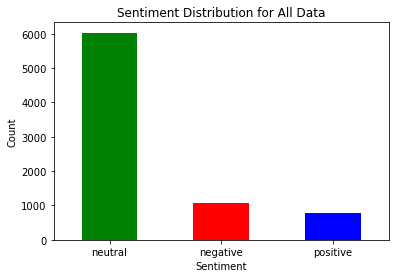

In [5]:
# Create a bar chart to visualize sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution for All Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

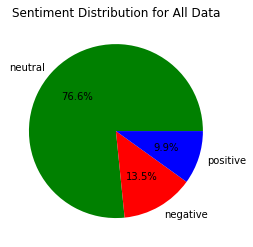

In [6]:
# Create a pie chart to visualize sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution for All Data')
plt.ylabel('')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


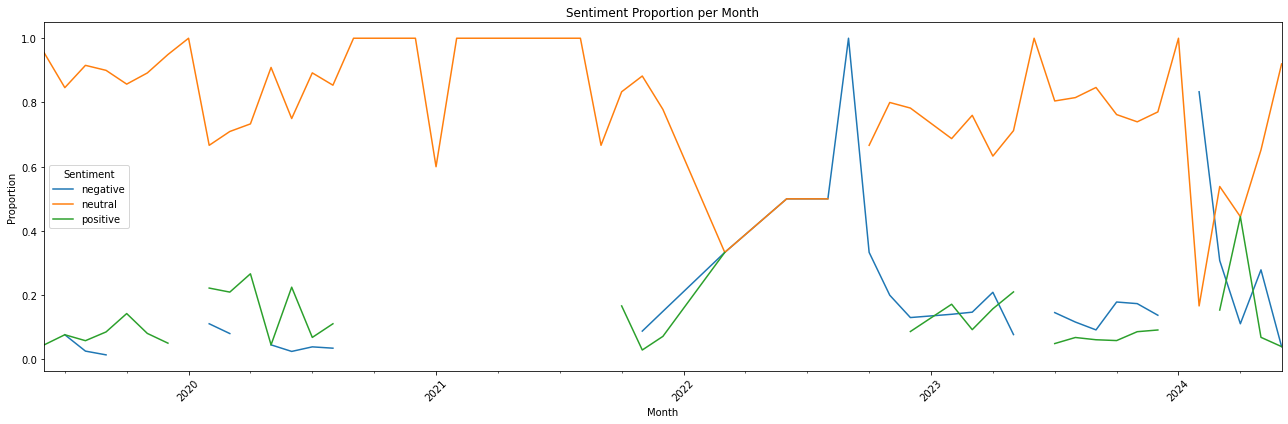

In [7]:
#Changing over time
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract month and year from the 'created_at' column
df['month_year'] = df['created_at'].dt.to_period('M')  # Get month and year

# Group the data by month and sentiment
grouped_data = df.groupby(['month_year', 'Sentiment']).size().unstack()

# Calculate the proportion of each sentiment for each month
grouped_data = grouped_data.apply(lambda x: x / x.sum(), axis=1)

# Plot the proportions over time
plt.figure(figsize=(18, 6))
grouped_data.plot(kind='line', ax=plt.gca())  # Use plt.gca() to get current axis for plotting
plt.title('Sentiment Proportion per Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [14]:
df[df['Sentiment'] == 'negative']

created_at  \
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
6    2023-02-05 12:15:18+00:00   
13   2023-02-11 10:52:01+00:00   
19   2023-02-16 03:32:56+00:00   
...                        ...   
6283 2024-05-29 11:19:48+00:00   
6288 2024-05-29 13:57:48+00:00   
6290 2024-05-29 15:02:27+00:00   
6294 2024-05-29 17:16:53+00:00   
6309 2024-05-29 22:36:35+00:00   

                                               Komentar Sentiment     Score  \
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
6     @sbtcon Dr bubble mu aja blg aku bisanya bayar...  negative  0.843887   
13    @convomfs kmren beli kopi di brand terkenal di...  negative  0.574514   
19    Sumpah ngakak banget anjir gue mau bayar ngiri...  negative  0.990136   
...                                                 ...       ...       ...   
6283  ᅠ Sebentar lagi agendanya mendirikan partai mi...  negative  0.597338   
6288  aku bru seneng please seabank gak failed pas s...  negative  0.821675   
6290  Hahanjiirr gue beli cilok 10rb sekarang bayarn...  negative  0.527773   
6294  INI LUCU BGT bcs aku perhitungan bgt perkara h...  negative  0.538351   
6309  emg paling bener ga pake dana lagi jirr sumpah...  negative  0.980271   

     month_year  
1       2023-02  
2       2023-02  
6       2023-02  
13      2023-02  
19      2023-02  
...         ...  
6283    2024-05  
6288    2024-05  
6290    2024-05  
6294    2024-05  
6309    2024-05  

[936 rows x 5 columns]

In [15]:
df[df['Sentiment'] == 'positive']

created_at  \
7    2023-02-06 02:00:31+00:00   
22   2023-02-18 05:30:06+00:00   
25   2023-02-20 08:07:58+00:00   
28   2023-02-20 15:51:32+00:00   
32   2023-02-21 11:47:02+00:00   
...                        ...   
6250 2024-05-29 03:40:38+00:00   
6271 2024-05-29 09:53:26+00:00   
6275 2024-05-29 10:19:59+00:00   
6295 2024-05-29 17:18:09+00:00   
6300 2024-05-29 18:37:24+00:00   

                                               Komentar Sentiment     Score  \
7     BAYAR JAJANAN TINGGAL PAKAI QRIS karena semua ...  positive  0.689322   
22    Gak usah bingung milih jajan enak atau jajan m...  positive  0.930325   
25    netflix sebulan yg murah bestie. yg bisa bayar...  positive  0.708233   
28    Hidup di Jakarta skrg apalagi ke mall atau ke ...  positive  0.796685   
32    Pecinta smoothies mana suaranya?? Mau jajan sm...  positive  0.832138   
...                                                 ...       ...       ...   
6250  Abis gajian langsung jajan di Shihlin makin ni...  positive  0.524345   
6271  Waaa bisa pakai QRIS nih.. keren kereen #PosIN...  positive  0.913522   
6275  Sobat BRI Mau liburan ke Singapura udah gaperl...  positive  0.770798   
6295  Ga pernah sekalipun belanja online pake QRIS d...  positive  0.831404   
6300  Deposit Via QRIS SUPER CEPAT &amp; PRAKTIS CAN...  positive  0.982596   

     month_year  
7       2023-02  
22      2023-02  
25      2023-02  
28      2023-02  
32      2023-02  
...         ...  
6250    2024-05  
6271    2024-05  
6275    2024-05  
6295    2024-05  
6300    2024-05  

[642 rows x 5 columns]

In [16]:
df[df['Sentiment'] == 'neutral']

created_at  \
0    2023-02-03 00:49:51+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
5    2023-02-04 16:08:44+00:00   
8    2023-02-06 09:18:22+00:00   
...                        ...   
6311 2024-05-29 23:32:57+00:00   
6312 2024-05-29 23:37:50+00:00   
6313 2024-05-29 23:49:48+00:00   
6314 2024-05-29 23:50:46+00:00   
6315 2024-05-29 23:56:44+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
5     literally sejak debat qris gw jd terbata2 kl m...   neutral  0.548960   
8     Sore @HaloBCA Mau tanya ini kok dari sabtu gin...   neutral  0.987334   
...                                                 ...       ...       ...   
6311  AKTORSLOT | SINARPLAY AUTO DP Qris Tanpa Nungg...   neutral  0.979788   
6312  ada yg udh open? mau beli kuota tri yg bisa ba...   neutral  0.996754   
6313  pagii aku open jasa cek turnitin dan unlock do...   neutral  0.973457   
6314  ada yg bisa tf gopay ke spay ga yaa akun aku b...   neutral  0.996622   
6315                        hari ini aku close dulu yaa   neutral  0.982370   

     month_year  
0       2023-02  
3       2023-02  
4       2023-02  
5       2023-02  
8       2023-02  
...         ...  
6311    2024-05  
6312    2024-05  
6313    2024-05  
6314    2024-05  
6315    2024-05  

[4738 rows x 5 columns]

In [17]:
# # Path to save the CSV file on Google Drive
# save_path = '/content/drive/MyDrive/menyala 🔥🔥/dataset/all data/data_20_24.csv'

# # Save the DataFrame to CSV
# df.to_csv(save_path, index=False)

## 2. Preprocessing

Preprocessing is what sentiment analysis is built on. A lot of the time, raw text data from places like social media is messy, noisy, and full of information that doesn’t matter. We need to clean and change this info in order to make sense of it. The accuracy of your sentiment analysis model can be greatly improved by doing the right preprocessing.

### 2.1 Text Cleaning

Text data, especially text from social media, can have parts that don’t have anything to do with the feeling we want to study. For example, hashtags (words or phrases that start with “#”), comments (usernames that start with “@”), and URLs (web links) are all parts that aren’t needed. It will be better to write without these words and sentences.

#### Remove Duplicate Tweets

In [8]:
# See how many duplicate tweets
df.duplicated().sum()

158

In [9]:
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [10]:
df.dropna(subset=['Komentar'], inplace=True)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year  
0       2023-02  
1       2023-02  
2       2023-02  
3       2023-02  
4       2023-02  
...         ...  
7866    2024-06  
7867    2024-06  
7868    2024-06  
7869    2024-06  
7870    2024-06  

[7713 rows x 5 columns]

#### Case Folding

In [11]:
# Define a function to convert text to lowercase
def lowercase(text):
    return text.lower()

df['clean_text'] = df['Komentar'].apply(lowercase)

df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02  semalem berhasil bayar pake qris https://t.co/...  
1       2023-02  *mbeli gula* mw bayar tunai atau debit? bs pak...  
2       2023-02  orang kristen tidak suka bayar tunai/cash kare...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02  @askrlfess coba diliat ditatonya nder kali aja...  
...         ...                                                ...  
7866    2024-06  haii haii kyu ada saldo receh nominal rahasia ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak! murce murce all e-wallet...  
7869    2024-06           mau netflix 1 bulan yg bs qris #zonauang  
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

#### Remove Emoji



In [12]:
# Define a function to remove emojis using a regex pattern
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['clean_text'] = df['clean_text'].apply(remove_emoji)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02  semalem berhasil bayar pake qris https://t.co/...  
1       2023-02  *mbeli gula* mw bayar tunai atau debit? bs pak...  
2       2023-02  orang kristen tidak suka bayar tunai/cash kare...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02  @askrlfess coba diliat ditatonya nder kali aja...  
...         ...                                                ...  
7866    2024-06  haii haii kyu ada saldo receh nominal rahasia ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak! murce murce all e-wallet...  
7869    2024-06           mau netflix 1 bulan yg bs qris #zonauang  
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

#### Remove URLs

In [14]:
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

df['clean_text'] = df['clean_text'].apply(remove_urls)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02                  semalem berhasil bayar pake qris   
1       2023-02  *mbeli gula* mw bayar tunai atau debit? bs pak...  
2       2023-02  orang kristen tidak suka bayar tunai/cash kare...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02  @askrlfess coba diliat ditatonya nder kali aja...  
...         ...                                                ...  
7866    2024-06  haii haii kyu ada saldo receh nominal rahasia ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak! murce murce all e-wallet...  
7869    2024-06           mau netflix 1 bulan yg bs qris #zonauang  
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

#### Remove Twitter Usernames



In [15]:
def remove_twitter_usernames(text):
    return re.sub("@[A-Za-z0-9_]+", "", text)

df['clean_text'] = df['clean_text'].apply(remove_twitter_usernames)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02                  semalem berhasil bayar pake qris   
1       2023-02  *mbeli gula* mw bayar tunai atau debit? bs pak...  
2       2023-02  orang kristen tidak suka bayar tunai/cash kare...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02   coba diliat ditatonya nder kali aja ada qris ...  
...         ...                                                ...  
7866    2024-06  haii haii kyu ada saldo receh nominal rahasia ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak! murce murce all e-wallet...  
7869    2024-06           mau netflix 1 bulan yg bs qris #zonauang  
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

####  Remove Punction and Number



In [18]:
def remove_number(text, default_replace=" "):
    text_without_numbers = re.sub(r'\d+', default_replace, text)
    return text_without_numbers
def remove_punctuation(text, default_text=" "):
    list_punct = string.punctuation
    delete_punct = str.maketrans('', '', list_punct)
    new_review = text.translate(delete_punct)
    return new_review
def remove_superscript(text):
    superscript_pattern = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"\U0000200D"
                      "]+", flags=re.UNICODE)
    return superscript_pattern.sub(r'', text)
df['clean_text'] = df['clean_text'].apply(remove_number)
df['clean_text'] = df['clean_text'].apply(remove_punctuation)
df['clean_text'] = df['clean_text'].apply(remove_superscript)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02                  semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...  
2       2023-02  orang kristen tidak suka bayar tunaicash karen...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02   coba diliat ditatonya nder kali aja ada qris ...  
...         ...                                                ...  
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...  
7869    2024-06                    mau netflix   bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

#### Remove Hashtags



In [26]:
# def remove_hashtags(text):
#     return re.sub("#[A-Za-z0-9_]+", "", text)

# df['clean_text'] = df['clean_text'].apply(remove_hashtags)
# df

In [19]:
def remove_hashtags(text):
    # Use a regular expression to find and replace hashtags
    return re.sub(r'#(\w+)', '', text)

# Apply the function to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(remove_hashtags)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02                  semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...  
2       2023-02  orang kristen tidak suka bayar tunaicash karen...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02   coba diliat ditatonya nder kali aja ada qris ...  
...         ...                                                ...  
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...  
7869    2024-06                    mau netflix   bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

#### Remove Words Repetition



In [20]:
def word_repetition(text):
    review = re.sub(r'(.)\1+', r'\1\1', text)
    return review

def repetition(text):
    repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', text, flags=re.IGNORECASE)
    return repeat

df['clean_text'] = df['clean_text'].apply(word_repetition)
df['clean_text'] = df['clean_text'].apply(repetition)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02                  semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...  
2       2023-02  orang kristen tidak suka bayar tunaicash karen...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02   coba diliat ditatonya nder kali aja ada qris ...  
...         ...                                                ...  
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...  
7869    2024-06                     mau netflix  bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

#### Remove Whitespaces


In [21]:
def remove_extra_whitespaces(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text.strip()  # Optional: Remove leading and trailing spaces

df['clean_text'] = df['clean_text'].apply(remove_extra_whitespaces)
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  
0       2023-02                   semalem berhasil bayar pake qris  
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...  
2       2023-02  orang kristen tidak suka bayar tunaicash karen...  
3       2023-02         ken arok kalo bayar pake qris mpu gandring  
4       2023-02  coba diliat ditatonya nder kali aja ada qris n...  
...         ...                                                ...  
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...  
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...  
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...  
7869    2024-06                       mau netflix bulan yg bs qris  
7870    2024-06  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 6 columns]

### change slang into standard terms

In [22]:
slangs = open('slang.txt',"r",encoding="utf-8", errors='replace')

clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['mw ', 'mau'], ['gw ', ' saya'], ['mbeli ', ' membeli '], ['gt ', '   '], ['zonauang ', ' '], ['benerbener', ' bener'], ['khidupan ', ' kehidupan'], ['buanyak ', ' banyak'], ['blkg ', ' belakang'], ['dhlh ', ' udah'], ['anjer ', ' '], ['anjir ', ' '], ['salty ', ' sinis'], ['dr ', ' dari'], ['abis ', ' habis'], ['ad ', ' ada'], ['alhmdulillah ', ' alhamdulillah'], ['alhamdulilah ', ' alhamdulillah'], ['alhamdulillaah ', ' alhamdulillah'], ['alhamdulillah ', ' alhamdulillah'], ['adminnya ', ' admin nya'], ['account ', ' akun'], ['asiikk ', ' asyik'], ['alpukatnya ', ' alpukat nya'], ['amin ', ' aamiin'], ['aplikasinnya ', ' aplikasi nya'], ['aplikasinya ', ' aplikasi nya'], ['awesome ', ' luar biasa'], ['asyilk ', ' asyik'], ['antaran ', ' pengantaran'], ['apus ', ' hapus'], ['Sumpahh ', ' Sumpah'], ['bgt ', ' banget'], ['Aseek ', ' Asik'], ['HUAA ', ' '], ['anjirrtransaksi ', ' transaksi'], ['so far ', ' sejauh ini'], ['gak ', ' tidak'], ['trus ', ' terus'], ['teruss 

In [23]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'&': 'dan',
 'mw': 'mau',
 'gw': 'saya',
 'mbeli': 'membeli',
 'gt': 'begitu',
 'zonauang': '',
 'benerbener': 'bener',
 'khidupan': 'kehidupan',
 'buanyak': 'banyak',
 'blkg': 'belakang',
 'dhlh': 'udah',
 'anjer': '',
 'anjir': '',
 'salty': 'sinis',
 'dr': 'dari',
 'abis': 'habis',
 'ad': 'ada',
 'alhmdulillah': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'alhamdulillaah': 'alhamdulillah',
 'alhamdulillah': 'alhamdulillah',
 'adminnya': 'admin nya',
 'account': 'akun',
 'asiikk': 'asyik',
 'alpukatnya': 'alpukat nya',
 'amin': 'aamiin',
 'aplikasinnya': 'aplikasi nya',
 'aplikasinya': 'aplikasi nya',
 'awesome': 'luar biasa',
 'asyilk': 'asyik',
 'antaran': 'pengantaran',
 'apus': 'hapus',
 'Sumpahh': 'Sumpah',
 'bgt': 'banget',
 'Aseek': 'Asik',
 'HUAA': '',
 'anjirrtransaksi': 'transaksi',
 'so far': 'sejauh ini',
 'gak': 'tidak',
 'trus': 'terus',
 'teruss': 'terus',
 'pengen': 'ingin',
 'kalo': 'kalau',
 'nggak': 'tidak',
 'udah': 'sudah',
 'ril': 'nyata',
 'gada': 'tid

In [24]:
from textblob import TextBlob
clean_text = []
for review in df['clean_text']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [25]:
df['normalization'] = clean_text

In [26]:
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  \
0       2023-02                   semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...   
2       2023-02  orang kristen tidak suka bayar tunaicash karen...   
3       2023-02         ken arok kalo bayar pake qris mpu gandring   
4       2023-02  coba diliat ditatonya nder kali aja ada qris n...   
...         ...                                                ...   
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...   
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...   
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...   
7869    2024-06                       mau netflix bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...   

                                          normalization  
0                     semalem berhasil bayar pakai qris  
1     membeli gula mau bayar tunai atau debit bisa p...  
2     orang kristen tidak suka bayar tunaicash karen...  
3          ken arok kalau bayar pakai qris mpu gandring  
4     coba diliat ditatonya nder kali saja ada qris ...  
...                                                 ...  
7866  haii kyu ada saldo receh nominal rahasia buat ...  
7867  banyak orang tidak tahu kalau mencari uang itu...  
7868  di aku siap ni kak murah all ewallet amp qris ...  
7869                   mau netflix bulan yang bisa qris  
7870  giveaway saldo receh buat ba only yang punya q...  

[7713 rows x 7 columns]

### delete words containing 3 letters

After analyzing the cleaned reviews, removing abstract words alone is not sufficient to make the reviews completely clean. I found some words that are inappropriate and confusing. Therefore, I proceeded to remove words consisting of 3 letters, such as 'oh,' 'yes,' 'this,' 'that,' etc., which do not provide crucial information for the model during predictions.

In [27]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [28]:
df['final_text'] = df['normalization'].apply(lambda remove: remove_small_words(str(remove)))
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  \
0       2023-02                   semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...   
2       2023-02  orang kristen tidak suka bayar tunaicash karen...   
3       2023-02         ken arok kalo bayar pake qris mpu gandring   
4       2023-02  coba diliat ditatonya nder kali aja ada qris n...   
...         ...                                                ...   
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...   
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...   
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...   
7869    2024-06                       mau netflix bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...   

                                          normalization  \
0                     semalem berhasil bayar pakai qris   
1     membeli gula mau bayar tunai atau debit bisa p...   
2     orang kristen tidak suka bayar tunaicash karen...   
3          ken arok kalau bayar pakai qris mpu gandring   
4     coba diliat ditatonya nder kali saja ada qris ...   
...                                                 ...   
7866  haii kyu ada saldo receh nominal rahasia buat ...   
7867  banyak orang tidak tahu kalau mencari uang itu...   
7868  di aku siap ni kak murah all ewallet amp qris ...   
7869                   mau netflix bulan yang bisa qris   
7870  giveaway saldo receh buat ba only yang punya q...   

                                             final_text  
0                     semalem berhasil bayar pakai qris  
1     membeli gula  bayar tunai atau debit bisa paka...  
2     orang kristen tidak suka bayar tunaicash karen...  
3                 arok kalau bayar pakai qris  gandring  
4     coba diliat ditatonya nder kali saja  qris   b...  
...                                                 ...  
7866  haii   saldo receh nominal rahasia buat  yang ...  
7867  banyak orang tidak tahu kalau mencari uang  se...  
7868    siap   murah  ewallet  qris direct message  ...  
7869                       netflix bulan yang bisa qris  
7870  giveaway saldo receh buat  only yang punya qri...  

[7713 rows x 8 columns]

In [37]:
# To display all values in the 'Komentar' column
all_komentar_values = df['final_text'].head(5).tolist()

# Join the values into a single string with line breaks
formatted_komentar = '\n'.join(all_komentar_values)

# Print the formatted string
print(formatted_komentar)

semalem berhasil bayar pakai qris
mbeli gula  bayar tunai atau debit bisa pakai qris  gkbisa  tunai saja mending tersenyum   dibayar tunai sahh tpuk tangan hadirin
orang kristen tidak suka bayar tunaicash karena dosa mereka dibayar dengan jesus qris
 arok kalau bayar pakai qris  gandring
coba diliat ditatonya nder kali saja  qris   bayar disitu saja


### 2. Tokenization



Words make up text data, and we need to look at each word separately in order to figure out how people feel about something. Just that is what tokenization does. It takes a phrase and breaks it up into words.

In [29]:
def word_token(text):
  return word_tokenize(text)

df['token'] = df['clean_text'].apply(lambda tokenize:word_token(str(tokenize)))
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  \
0       2023-02                   semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...   
2       2023-02  orang kristen tidak suka bayar tunaicash karen...   
3       2023-02         ken arok kalo bayar pake qris mpu gandring   
4       2023-02  coba diliat ditatonya nder kali aja ada qris n...   
...         ...                                                ...   
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...   
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...   
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...   
7869    2024-06                       mau netflix bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...   

                                          normalization  \
0                     semalem berhasil bayar pakai qris   
1     membeli gula mau bayar tunai atau debit bisa p...   
2     orang kristen tidak suka bayar tunaicash karen...   
3          ken arok kalau bayar pakai qris mpu gandring   
4     coba diliat ditatonya nder kali saja ada qris ...   
...                                                 ...   
7866  haii kyu ada saldo receh nominal rahasia buat ...   
7867  banyak orang tidak tahu kalau mencari uang itu...   
7868  di aku siap ni kak murah all ewallet amp qris ...   
7869                   mau netflix bulan yang bisa qris   
7870  giveaway saldo receh buat ba only yang punya q...   

                                             final_text  \
0                     semalem berhasil bayar pakai qris   
1     membeli gula  bayar tunai atau debit bisa paka...   
2     orang kristen tidak suka bayar tunaicash karen...   
3                 arok kalau bayar pakai qris  gandring   
4     coba diliat ditatonya nder kali saja  qris   b...   
...                                                 ...   
7866  haii   saldo receh nominal rahasia buat  yang ...   
7867  banyak orang tidak tahu kalau mencari uang  se...   
7868    siap   murah  ewallet  qris direct message  ...   
7869                       netflix bulan yang bisa qris   
7870  giveaway saldo receh buat  only yang punya qri...   

                                                  token  
0                [semalem, berhasil, bayar, pake, qris]  
1     [mbeli, gula, mw, bayar, tunai, atau, debit, b...  
2     [orang, kristen, tidak, suka, bayar, tunaicash...  
3     [ken, arok, kalo, bayar, pake, qris, mpu, gand...  
4     [coba, diliat, ditatonya, nder, kali, aja, ada...  
...                                                 ...

In [30]:
# To display all values in the 'Komentar' column
all_komentar_values = df['token'].head(5).tolist()


# Print the formatted string
print(all_komentar_values)

[['semalem', 'berhasil', 'bayar', 'pake', 'qris'], ['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'atau', 'debit', 'bs', 'pake', 'qris', 'wow', 'gkbisa', 'dik', 'tunai', 'aja', 'mending', 'tersenyum', 'ni', 'jt', 'dibayar', 'tunai', 'sahh', 'tpuk', 'tangan', 'hadirin'], ['orang', 'kristen', 'tidak', 'suka', 'bayar', 'tunaicash', 'karena', 'dosa', 'mereka', 'dibayar', 'dengan', 'jesus', 'qris'], ['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris', 'mpu', 'gandring'], ['coba', 'diliat', 'ditatonya', 'nder', 'kali', 'aja', 'ada', 'qris', 'nah', 'ntr', 'bayar', 'disitu', 'aja']]


### Wordcloud Vizualitation

In [31]:
review_all = []

for Komentar in df['final_text']:
  text = Komentar.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

semalem
berhasil
bayar
pakai
qris
membeli
gula
bayar
tunai
atau
debit
bisa
pakai
qris
gkbisa
tunai
saja
mending
tersenyum
dibayar
tunai
sahh
tpuk
tangan
hadirin
orang
kristen
tidak
suka
bayar
tunaicash
karena
dosa
mereka
dibayar
dengan
jesus
qris
arok
kalau
bayar
pakai
qris
gandring
coba
diliat
ditatonya
nder
kali
saja
qris
bayar
disitu
saja
literally
sejak
debat
qris
saya
jadi
terbata
kalau
bayar
literally
kemarin
saya
bicara
bayarnya
pakai
saja
bisa
akan
dari
bubble
saja
bilang
bisanya
bayar
pakai
qris
terus
seller
tidak
dipikiran
seller
kami
tidak
bisa
beli
bayar
jajanan
tinggal
pakai
qris
karena
semua
balasan
qris
seabank
unduh
seabank
sekarang
buat
mendapatkan
keuntungan
lainnya
dari
seabank
sore
tanya
dari
sabtu
begini
terus
saya
bayar
pakai
qris
gangguan
tidak
masuk
penerima
canva
bulan
yang
bisa
bayar
pakai
qris
spotify
pakai
akun
sendiri
need
fast
bisa
bayar
apke
qrisbni
appreciated
terima
kasih
untuk
halo
bawa
siap
stock
gepeng
genshin
impact
honkai
star
rail
harganya
each
da

lama
make
habis
fitur
qris
iseng
daftar
bisa
tapi
minusnya
qrisnya
namanya
mitrablnomer
random
begitu
jadi
bukan
nama
usahamu
enaknya
jadi
tiap
transaksi
tidak
potongan
halo
untuk
keluhan
qris
biar
cepat
ditangani
menghubungi
layanan
live
chat
kami
caranya
gampang
buka
aplikasi
dana
masuk
menu
riwayathistory
pilih
transaksi
yang
ingin
dikeluhkan
lihat
pada
sisi
kanan
pojok
bawah
klik
menu
chat
terima
kasih
halo
untuk
pertanyaan
qris
yang
diajukan
infoin
transaksi
qris
dapat
menggunakan
pembayaran
kartu
debitkredit
yang
sudah
terbinding
dengan
dana
terima
kasih
halo
dengan
keluhan
kamu
untuk
keluhan
transaksi
qris
saat
masih
dalam
penanganan
resolusi
kami
mohon
menunggu
proses
updatenya
dari
resolusi
kami
terima
kasih
masih
untuk
promo
menggunakan
qris
dengan
mendapatkan
cashback
maksimal
minimum
pembelian
dalam
kali
transaksi
user
minggu
bonus
hingga
poin
untuk
transaksi
dengan
kartu
debit
bonus
kupon
untuk
transaksi
dengan
qris
mobile
banking
bonus
tiket
pesawat
domestik
untuk
transak

bisa
sampai
kalau
memenuhi
“
mission
”
transaksi
qris
kali
saldo
digitalbayar
tagihan
ribu
sebulan
hanya
kategori
transaksi
yang
kita
pilih
tapi
halo
wanto
maaf
sudah
buat
kamu
kecewa
untuk
keluhan
transaksi
qris
kamu
sudah
infoin
melalui
inbox
terima
kasih
sejumlah
transaksi
qris
bermasalah
saran
direktur
help
retweet
kami
membuka
donasi
untuk
korban
dari
kejadian
plumpang
yang
terjadi
beberapa
waktu
lalu
donasi
akan
disalurkan
jika
sudah
memenuhi
target
untuk
donasi
silakan
scan
qris
bawah
berapa
nominalnya
kami
menerima
dengan
senang
hati
terima
kasih
saya
juga
kaget
qris
trpampang
nyata
wkwk
penipu
ricev
transaksi
segitiga
surat
pernyataan
kuasa
rekening
settlement
mechant
jika
rekening
settlement
bukan
atas
nama
merchant
dokumen
pendukung
sesuai
sarana
transaksi
yang
dipilih
untuk
pengajuan
merchant
qris
statis
apabila
tidak
memiliki
danatau
sumpah
habis
payment
pakai
qris
tiba
dapat
penawaran
saya
twrnyata
langsung
payment
transaksi
saya
ranpa
tiba
saldo
saya
sudah
terpotong
saja

buat
transaksi
qris
saja
kurangnya
qris
besoknya
baru
masuk
saldo
kalau
orang
kirim
suatu
transaksi
kita
bingung
uang
sudah
masuk
atau
belum
sebab
histori
mutasi
mobile
banking
data
belum
halo
untuk
keluhan
mengenai
nama
bisnis
pada
akun
dana
bisnis
mulai
agustus
perubahan
nama
sudah
tidak
dapat
dilakukan
nama
bisnis
merupakan
identitas
usaha
yang
tidak
dapat
diubah
tidak
mempengaruhi
pada
transaksi
qris
kamu
terima
kasih
pertama
kali
makan
keluar
sama
dibonceng
beli
bensin
pakai
uang
makan
bakso
saya
memikirkan
masa
semua
yang
bayar
yaudah
bilang
kalau
yang
bakso
saja
yang
bayar
awalnya
nolak
tetapi
saya
langsung
ngeluarin
handphone
buat
scan
qris
lebih
tahu
diri
saja
ronny
terkait
estimasi
waktu
dana
transaksi
yang
sampai
rekening
penjual
merupakan
kebijakan
dari
penyelenggara
sehingga
kamu
dapat
berkoordinasi
dengan
penyelenggara
terkait
sebagai
informasi
yang
termasuk
cakupan
pengaturan
adalah
skema
harga
biaya
pemrosesan
transaksi
qris
dalam
pemrosesan
transaksi
menggunakan
qris
t

transaksi
qris
akan
terbayarkan
secara
otomatis
kerekening
merchant
jika
transaksi
dilakukan
sebelum
namun
jika
transaksi
dilakukan
setelah
maka
akan
masuk
kerekening
diskon
daur
lada
dengan
qris
mobilesakuku
debit
minimal
transaksi
hingga
semua
orang
harus
tahu
mimin
semua
orang
tahu
kalau
transaksi
pakai
qris
like
balasan
qris
seabank
sebanyakbanyaknya
kalau
kamu
hadiah
spesial
dari
mimin
yang
jual
netflix
untuk
bulan
bayar
pakai
qris
langsung
proses
sekarang
halo
masa
saya
transaksi
merchant
pakai
qris
dipotong
kali
sudah
lapor
pelayanan
pelanggan
harus
tunggu
hari
jawabannya
“
investigasi
”
hayoolah
kegiatan
dilanjutkan
dengan
pengumuman
pemenang
dengan
kategori
umkm
transaksi
qris
terbanyak
lomba
mewarnai
lomba
sholawat
lomba
busana
muslim
harun
sulianto
kegiatan
dilanjutkan
dengan
pengumuman
pemenang
dengan
kategori
umkm
transaksi
qris
terbanyak
lomba
mewarnai
lomba
sholawat
lomba
busana
muslim
transaksi
dilakukan
awal
menghindari
wajib
menanyakan
stock
terlebih
dahulu
mengirim
f

kembalian
belanja
alfamidi
kamu
virgo
untuk
mendapatkan
kupon
cashback
senilai
total
untuk
transaksi
qris
siapa
yang
suka
bayar
pakai
virgo
saat
belanja
alfamidi
masukan
kembalian
belanja
alfamidi
kamu
virgo
untuk
mendapatkan
kupon
cashback
senilai
total
untuk
transaksi
qris
tidak
aman
kata
saldo
baru
hilang
taro
dana
goals
tiba
transaksi
lewat
qris
untuk
pilihan
lain
mungkin
sangat
bisa
menggunakan
shopee
partner
untuk
para
client
transaksi
akan
tetap
berjalan
mungkin
payment
qris
belum
bisa
saya
accept
untuk
sementara
terima
kasih
banyak
seru
banget
bisa
scan
qris
thai
yang
cari
pencairan
cepat
bisa
langsung
menghubungi
whatsapp
karena
kalau
inbox
biasanya
tidak
masuk
untuk
kita
memulai
ajaa
buat
testi
bisa
instagram
lain
lain
atau
profile
guys
bisa
cepat
proses
menit
melalui
scan
qris
mendorong
percepatan
digitalisasi
transaksi
pemerintah
kabupaten
sidrap
bekerja
sama
perseroan
terbatas
bank
sulselbar
melaksanakan
peluncuran
qris
dinamis
jumat
halo
maaf
tapi
katanya
upgrade
akun
cum

kanan
bawah
terus
pindah
dari
personal
jadi
bisnis
bagian
atas
tapi
harus
diaktifin
dahulu
tukarkan
poin
powermu
jadi
saldo
linkaja
bisa
dipakai
buat
saja
dari
bayar
tagihan
hingga
transaksi
merchant
qris
informasi
lengkap
pede
pelanggan
pelayanan
linkaja
live
chat
kali
kamu
akan
ditemani
dengan
berbagai
minuman
pilihan
dari
maxx
coffee
nikmati
harga
hanya
untuk
pilihan
minuman
favoritmu
dengan
transaksi
menggunakan
qris
mobile
banking
beli
sekarang
informasi
selengkapnya
halo
saya
kemarin
mengirim
uang
dari
lewat
qris
dana
bisnis
dalam
aplikasi
transaksi
sudah
berhasil
uang
saya
terpotong
namun
uang
tersebut
belum
masuk
pada
dana
saya
mohon
ditindak
lanjuti
qris
mudahkan
wisatawan
indonesia
transaksi
asean
sudah
teknologi
namanya
bayar
dahulu
pakai
bank
transferqris
terapkan
pemakaian
qris
yang
lebih
praktis
saat
transaksi
gandeng
gerai
alfamart
untuk
dukung
fitur
qris
mobitekno
–
financial
technology
fintech
unicorn
pertama
indonesia
meluncurkan
fitur
baru
…
walaupun
tidak
bawa
uang


bisa
bayar
lewat
qris
tidak
bisa
sudah
coba
tarik
tunai
tidak
bisa
paling
maksimal
kalau
jajan
atau
makan
diluar
terus
ternyata
bisa
qris
selalu
bayar
qris
mintt
soalnya
tukang
soto
gerobakan
tukang
seblak
juga
pakai
qris
nyiapin
tunai
buat
kecepatan
transaksi
saja
merchant
yang
bisa
menimbulkan
antrian
kalau
pakai
qris
misalnya
spbu
yang
merasa
pernah
bermasalah
dengan
transaksi
qris
dana
atas
nama
denaa
bisa
direct
message
nyebabin
kena
kerugian
yang
lumayan
soalnya
katanya
laporan
dari
pengguna
lain
terkait
indikasi
penipuan
padahal
tidak
pernah
tipu
sama
sekali
prem
yang
langsung
pakai
qris
jieguem
juseyo
minimal
tanggal
maret
transaksi
saya
pakai
dana
qris
pending
uang
belum
balik
juga
sampai
sekarang
bagaimana
agak
percuma
pakai
qris
karena
merchant
masih
tidak
paham
kalau
qris
bisa
menerima
dari
platform
pembayaran
apapun
masih
belum
teredukasi
para
merchant
kalau
qris
harus
pakai
seterusnya
sambut
ramadan
penuh
dari
aplikasi
neobank
rajin
transaksi
dengan
aplikasi
neobank
menan

nilai
baht
secara
langsung
saat
transaksi
semoga
informasinya
membantu
sholat
taun
lalu
juga
daerah
rumahku
sudah
pakai
qris
sobat
otto
saatnya
beli
asuransi
kritis
yang
sangat
gampang
mulai
dari
bisa
tapin
dari
transaksi
qris
cuma
aplikasi
otto
jadi
yang
pertama
untuk
peduli
terhadap
penyakit
kritis
halo
bpkibu
mohon
maaf
atas
ketidaknyamanan
apabila
yang
dimaksud
bpkibu
untuk
melakukan
transaksi
transfer
menggunakan
qris
qris
orang
lain
maka
tidak
bisa
qris
hanya
dapat
dilakukan
untuk
melakukan
transaksi
merchant
saja
semoga
sukses
selalu
tkscharles
pasar
murah
transaksi
pakai
qris
bonus
minyak
goreng
daftarnya
gratiss
tidak
biaya
bulanan
transaksi
satset
pakai
qris
promo
cashback
kapan
lagi
nabung
dapat
untung
dorong
penggunaan
qris
gandeng
alfamart
dalam
transaksi
digital
sobat
kami
informasikan
transaksi
qris
brimo
dapat
digunakan
untuk
seluruh
kartu
kredit
kecuali
corporate
card
cobranding
akun
resmi
media
sosial
sudah
terverified
untuk
mendapatkan
layanan
yang
lebih
seru
yang
bi

shopee
begitu
scan
qris
begitu
klik
pojok
kanan
atas
begitu
unggah
qris
mantap
banget
sekarang
belanja
hypermart
bisa
bayar
pakai
qris
akulaku
pastinya
diskon
hingga
ribu
buruan
serbu
untuk
program
campaign
give
meliputi
ekonomi
pendidikan
kemanusiaan
masjid
lain
sebagainya
sedangkan
platform
sedekah
daring
penghimpun
dana
zakat
infak
wakaf
dikelola
oleh
maslahat
bisa
erdonasi
semudah
scan
qris
sedangkan
adalah
platform
sedekah
daring
penghimpun
dana
zakat
infak
wakaf
yang
dikelola
oleh
maslahat
dengan
sahabat
bisa
berdonasi
semudah
scan
qris
maslahat
punya
campaign
produk
baru
give
meliputi
ekonomi
pendidikan
kemanusiaan
masjid
lain
lain
goamal
adalah
platform
sedekah
daring
penghimpun
dana
zakat
infak
wakaf
dikelola
maslahat
goamal
bisa
berdonasi
semudah
scan
qris
sobat
bumn
brimo
hadir
untuk
penuhi
kebutuhan
bulan
suci
pakai
brimo
kamu
bisa
melakukan
berbagai
transaksi
seperti
bayar
takjil
makin
praktis
dengan
fitur
qris
kalau
scan
qris
toko
mamah
biar
bisa
tarik
uangnya
lagi
hehe
j

makanan
yang
available
saja
tinggal
pesan
bayar
pakai
qris
terus
tunggu
datang
saja
hehe
alfamaret
bisa
bayar
pakai
qris
tidak
siapa
yang
belum
tahu
tentang
qris
transaksi
digital
yang
berbentuk
code
yang
membuat
transaksi
menjadi
lebih
cepat
aman
mudah
tapi
bagaimana
cari
qris
yang
benar
coba
simak
video
diatas
kira
kalian
selama
cara
pengejaan
kalian
sudah
benar
belum
bayar
utang
puas
bisa
pakai
qris
tidak
selamat
malam
untuk
metode
pembayaran
pada
perjalanan
kakak
lokal
walahar
ekspress
melalui
access
tersedia
ewallet
qris
apabila
kakak
ingin
melakukan
pembayaran
menggunakan
linkaja
silakan
pilih
metode
qris
silakan
bayar
menggunakan
linkaja
terima
kasih
malam
minimal
saya
lapor
tadi
saya
transaksi
onebellpark
cafe
melakukan
qris
mobile
banking
saya
berhasil
tapi
mesin
debitnya
belum
masuk
bagaimana
minimal
canggih
juga
sekarang
sudah
bisa
pakai
qris
meskipun
beli
tiket
dahulu
aplikasi
jaklingko
terus
masukkan
qrisnya
aplikasi
ewalletnya
buat
bayar
lebih
canggih
lagi
kalau
bisa
paka

tukarkan
poin
powermu
jadi
saldo
linkaja
saldo
bisa
buat
saja
dari
beli
pulsa
bayar
tagihan
transaksi
merchant
qris
selengkap
disini
pede
pelanggan
pelayanan
linkaja
live
chat
tukarkan
poin
powermu
jadi
saldo
linkaja
saldo
bisa
buat
saja
dari
beli
pulsa
bayar
tagihan
transaksi
merchant
qris
selengkap
disini
pede
pelanggan
pelayanan
linkaja
live
chat
yang
qris
juga
sama
pernah
bayar
pegawainya
sampai
ngeyel
kalau
tidak
bisa
beda
bank
wkwkwkkw
same
thing
with
qris
aateh
bayar
pakai
qris
bank
tidak
bisa
sini
bisanya
cuma
bank
kecap
sigh
drama
makan
bayar
pakai
qris
kelebihan
qris
semua
merchanttoko
belum
terkoneksi
pernah
beli
baju
terus
baru
sadar
dompet
ketinggalan
bayar
pakai
qris
ditolak
mending
banyak
pakai
qris
dibanding
harus
transaksi
lewat
visa
jadi
pertanyaan
bukannya
qris
bisa
transaksi
semua
termasuk
dana
lain
lain
kemarin
bayar
pakai
qris
kasirnya
bertanya
bank
saya
jawab
bingung
karena
qris
yang
punya
minimarket
agak
lama
ngedumel
akhirnya
iyain
bayar
pakai
qris
jadi
pertany

kalau
aman
pakai
tinggal
pakai
handphone
beres
buat
setor
tarik
uang
transaksi
qris
dana
buat
mindahin
dari
jago
biar
tidak
biaya
admin
jago
buat
nabung
terus
transferan
sana
sini
tanpa
biaya
admin
sama
buat
gopay
terus
buat
bayar
qris
juga
tidak
terpakai
tidak
salah
tapi
contactless
akan
masalah
juga
kalau
sinyal
tidak
pernah
seperti
orang
bodoh
menunggu
sinyal
bayar
pakai
qris
saran
saya
lebih
sediain
satu
gate
khusus
buat
yang
petugasnya
perbanyak
mesin
umum
tanpa
harus
buka
rekening
rest
area
jadi
meski
sekarang
atau
sudah
bisa
bayar
pakai
qris
atau
tapi
masih
belum
boleh
untuk
menggantikan
kartu
prepaid
sebagai
pembayaran
utama
karena
accessibility
dari
kartu
prepaid
jadi
meski
sekarang
atau
sudah
bisa
bayar
pakai
qris
atau
tapi
masih
belum
boleh
untuk
menggantikan
kartu
prepaid
sebagai
pembayaran
utama
karena
accessibility
dari
kartu
prepaid
kemarin
jakarta
stuck
loophole
tidak
punya
kartu
bank
lokal
bayar
kereta
bandara
tergsntung
mood
edcnya
baca
kartu
asingminimart
flazz
tidak

saldo
qris
menyebalkan
menurutku
tidak
semua
sinyal
gampang
wkwk
mending
pakai
model
kartu
emoney
buat
saat
sama
dikembangkan
lagi
kalau
yang
handphone
sinyal
roto
boro
bayar
pakai
handphone
dimanapun
wkwk
tidak
begitu
talangin
karena
memang
tidak
pegang
tunai
kalau
transaksi
melalui
qris
mungkin
tidak
perlu
minta
talangin
hehe
ganti
uangnya
menit
juga
tapi
pernah
mengalami
punya
teman
yang
kayak
begitu
minta
talangin
tapi
lupa
bayar
biasanya
kalau
bayar
melalui
scan
qris
disiapin
dahulu
aplikasi
barudeh
mengantre
jadi
sudah
kasir
tinggal
bilang
mbak
scan
qris
scan
terus
udadeh
cepat
banget
tidak
perlu
mencari
recehan
juga
dompet
sini
nanti
klok
sudah
jadi
qris
baru
bayar
guys
bertanya
kenapa
spay
tidak
bayar
qris
memang
belum
prem
tapi
hrsnya
bisa
bayar
qris
gagal
gituu
tulisannya
demi
keamanan
anda
blablabla
yang
tahu
tidak
bagaimana
beli
jajan
bayar
pakai
qris
karena
tidak
tunai
tapi
lupa
tidak
punya
kuota
chuaks
siapa
akuakuaku
bayar
tidak
kalau
bikin
qris
dari
sung
dulu
coba
harus

kalau
kasih
cashback
untung
banget
kalau
jajan
bayar
pakai
qris
mandiri
bayar
transaksi
pakai
qris
mandiri
jelas
lebih
gampang
banyak
cashback
menarik
yang
bisa
kita
dapatkan
sobat
seabank
dengan
senang
hati
mimin
informasikan
untuk
transaksi
belanja
minimarket
dapat
kamu
lakukan
pembayaran
menggunakan
qris
seabank
pastikan
barcode
pada
pembayaran
minimarket
tersebut
terdapat
logo
semoga
informasinya
membantufw
bayar
belanja
pakai
qris
mall
nominal
bayar
saya
setengah
total
angka
saldonya
kaget
soalnya
tidak
sampai
seribu
toko
sejam
lagi
tutup
apakah
qris
masih
jadi
opsi
kesekian
dibanding
tunai
atau
gesek
bayar
belanja
pakai
qris
mall
nominal
bayar
saya
setengah
total
angka
saldonya
kaget
soalnya
tidak
sampai
seribu
toko
sejam
lagi
tutup
apakah
qris
masih
jadi
opsi
kesekian
dibanding
tunai
atau
gesek
tukang
parkir
ngabari
bayar
mggo
qris
ngdi
potongan
admin
gede
banget
pernah
denger
bisa
tanpa
potongan
admin
tapi
belum
pernah
melajari
sebagai
pelanggan
senang
banget
saya
pakai
qris
ta

cashless
kita
selalu
sounding
pelanggan
untuk
guna
qris
karena
memang
murah
bingit
bayangin
saja
sekitar
dari
sales
tiap
bulan
keluar
buat
bayar
saja
berapa
ratus
juta
perusahaan
saya
hemat
jika
peralihan
dari
qris
sekitar
transaksi
perbulan
pakai
brimo
kamu
bisa
melakukan
berbagai
transaksi
seperti
bayar
takjil
makin
praktis
dengan
fitur
qris
bayar
zakat
dengan
fitur
donasi
transfer
lain
lain
semua
transaksi
jadi
gampang
pakai
fitur
qris
dari
bayar
belanjaan
sampai
donasi
pakai
brimo
kamu
bisa
melakukan
berbagai
transaksi
seperti
bayar
takjil
makin
praktis
dengan
fitur
qris
bayar
zakat
dengan
fitur
donasi
transfer
lain
lain
pakai
brimo
kamu
bisa
melakukan
berbagai
transaksi
seperti
bayar
takjil
makin
praktis
dengan
fitur
qris
bayar
zakat
dengan
fitur
donasi
transfer
lain
lain
open
jasa
pinjam
qris
transaksi
pakai
brimo
kamu
bisa
melakukan
berbagai
transaksi
seperti
bayar
takjil
makin
praktis
dengan
fitur
qris
bayar
zakat
dengan
fitur
donasi
transfer
lain
lain
pakai
brimo
kamu
bisa
mel

melonjak
jelang
akhir
tahun
keuangan
kontan
oala
ternyata
error
malu
banget
senja
beli
kopi
ribu
qris
error
ewallet
duitnya
kurang
tunai
tidak
punya
tunai
debit
minimal
transaksi
ribu
transaksi
antar
penduduk
asean
akan
semakin
mudah
dengan
qris
tidak
perlu
tukar
uang
mata
uang
lain
lewat
lagi
nomor
spread
kurs
jual
beli
baca
akses
harian
kompas
praktis
kapan
saja
dari
mana
saja
lewat
aplikasi
unduh
sekarang
saya
juga
dahulu
gituu
ahaha
numpang
lewat
buat
pakai
digital
cardnya
saya
user
dulunya
sekarang
transaksi
hampir
semua
pakai
jago
qris
sama
debit
card
yang
paling
terpakai
fitur
shared
pocketnya
cocok
banget
buat
pasutri
biar
transparan
pakai
brimo
kamu
bisa
melakukan
berbagai
transaksi
seperti
bayar
takjil
makin
praktis
dengan
fitur
qris
bayar
zakat
dengan
fitur
donasi
transfer
bayar
tiket
mudik
berbagai
kecanggihan
lain
yang
disediakan
untuk
temanimu
bulan
ramadhan
please
teman
gausa
pakai
jenius
bikin
susah
saja
sering
maintenence
tidak
jelas
kadang
transaksi
pakai
qris
tidak
m

respons
code
indonesian
standard
qris
daily
transaksi
qris
lain
lain
tarik
tunai
bikos
disini
masih
ribu
banyak
pula
bank
mandiri
menargetkan
pertumbuhan
transaksi
qris
atas
secara
tahunan
bank
mandiri
mencatat
peningkatan
hingga
april
lebih
dari
juta
transaksi
dengan
nominal
transaksi
hampir
triliun
dari
jumlah
total
merchant
qris
april
sebanyak
merchant
saya
transaksi
melalui
qris
statusnya
sukses
saldo
juga
terpotong
tapi
merchant
belum
terima
uangnya
rekening
mereka
dari
kemarin
buat
pengaduan
semua
media
tidak
yang
direspons
toling
direct
message
capek
banget
sama
toko
kalau
bayar
pakai
kartu
pasti
langsung
dicegat
maaf
transaksi
minimal
ribu
baru
bisa
gesek
kartu
debit
kalau
tidak
minimal
ribu
kalau
kartu
kredit
atau
kalau
scan
qris
biaya
tambahan
ribu
transaksi
bisa
tidak
mereka
ngasih…
halo
dengan
keluhan
kamu
untuk
indomaret
saat
belum
tersedia
namun
kamu
dapat
melakukan
transaksi
pembayaran
menggunakan
dana
dengan
cara
scan
qris
yang
pada
indomaret
terima
kasih
saya
transaksi

atas
secara
tahunan
tahun
bank
indonesia
tidak
mengatur
minimum
transaksi
qris
sobat
terkait
tersebut
kamu
dapat
berkoordinasi
dengan
pihak
penyedia
jasa
pembayaran
terkait
adapun
bank
indoensia
mengatur
batas
maksimal
transaksi
melalui
qris
sebesar
sepuluh
juta
rupiah
transaksi
semoga
informasinya
membantu
semoga
transaksimu
selalu
lancar
cara
ikutannya
bagaimana
buka
aplikasi
mobile
banking
atau
ewallet
apapun
yang
hpmu
scan
qris
ipebi
peduli
masukkan
nominal
rupiah
screenshot
bukti
transaksi
qris
unggah
pada
link
selanjutnya
untuk
skema
biaya
pemrosesan
transaksi
qris
ditetapkan
oleh
bank
indonesia
dengan
memperhitungkan
rekomendasi
perwakilan
industri
adapun
skema
biaya
yang
diatur
adalah
transaksi
untuk
qris
reguler
adalah
untuk
jajan
iims
surabaya
ditraktir
danamon
nikmati
cashback
hingga
transaksi
famp
biasa
dengan
qris
dbank
promo
hanya
iims
surabaya
juni
grand
city
surabaya
samp
berlaku
informasi
mulai
biasakan
guna
qris
dalam
setiap
transaksi
ternyata
juga
bantu
majukan
pariw

wallet
bank
juga
qris
senang
jajan
halo
dengan
keluhan
kamu
untuk
keluhan
transaksi
qris
silakan
direct
message
kamu
terima
kasih
halo
terima
kasih
telah
menghubungi
kredivo
jika
yang
kakak
dimaksud
transaksi
menggunakan
qris
saat
menggunakan
limit
kredivo
tenor
hari
untuk
maksimum
limit
transaksi
qris
adalah
semua
transaksi
akan
oleh
terkait
cara
transaksi
qris
gimanaa
diskon
untuk
menu
makanan
abalone
dengan
qris
debit
kartu
kredit
minimal
transaksi
hingga
selamat
pagi
dengan
senang
hati
kami
bantu
informasikan
transaksi
kartu
kredit
belum
bisa
menggunakan
fitur
pembayaran
menggunakan
qris
tunggu
inovasi
selanjutnya
promo
welkin‼
promo
sampai
sold
avail
slot
–
melalui
unipinrazer
–
proses
menit
setelah
transaksi
–
pembayaran
melalui
qrisdanaspayovo
transaksi
kemanapun
sekarang
pasti
lebih
mudah
dengan
qris
seabank
kamu
bisa
melakukan
transaksi
merchant
apapun
mencoba
qris
sekarang
rajin
ramein
tweet
mimin
untuk
mendapatkan
kesempatan
memba
pulang
hadiah
mimin
balasan
nabung
teman
kam

bayar
pakai
qris
sampai
tunjukkn
transaksi
palsu
karena
yang
jual
juga
tidak
sudah
masuk
tidak
sorry
kalau
transaksi
pakai
qris
bagaimana
caranya
rata
nilai
transaksi
qris
bulannya
mencapai
miliar
lebih
pakai
buat
jajan
pakai
qris
saja
nabung
cimb
transaksi
pakai
terus
kalau
bank
lain
pakai
flip
soalnya
flip
pakai
kakak
dapat
gunakan
metode
pembayaran
qris
yang
terdapat
pada
apliaksi
untuk
melakukan
transaksi
pada
merchant
solaria
kakak
juga
dapat
detail
merchant
offline
main
slot
tapi
rungkad
terus
gabung
bareng
situs
paling
•
minimal
deposit
hanya
•
untuk
seluruh
game
tiktok
•
deposit
melalui
pulsa
ewallet
transfer
bank
•
transaksi
lebih
cepat
praktis
melalui
qris
tukarkan
poin
powermu
jadi
saldo
linkaja
bisa
dipakai
buat
saja
dari
beli
pulsa
bayar
tagihan
hingga
transaksi
merchant
qris
informasi
lengkap
tautan
pede
pelanggan
pelayanan
linkaja
live
chat
spay
dana
yang
bisa
bayar
pakai
qris
dong
saya
mengajukan
keluhan
mengenai
pembayaran
double
melalui
form
feedback
seminggu
lalu
dim

diskon
buat
tiket
masuk
iims
surabaya
bayarnya
pakai
qris
dbank
dari
ribu
jadi
ribu
beli
tiketnya
spot
tiket
weekend
besok
ingin
nonton
konser
iims
infinite
live
yang
beli
tiket
bundle
promo
spesial
diskon
iims
surabaya
pakai
danamon
qris
dbank
dari
ribu
jadi
ribu
beli
tiketnya
spot
tiket
mudah
dapat
pacar
untung
danamon
dbank
pakai
qris
bisa
dapat
cashback
jadi
keliling
iims
jadi
tidak
takut
buat
jajan
tanggal
weekend
banget
konser
iims
infinite
live
jadi
bisa
nyanyi
bareng
kahitna
beli
tiket
bundle
promo
spesial
diskon
iims
surabaya
pakai
danamon
qris
dbank
dari
ribu
jadi
ribu
beli
tiketnya
spot
tiket
gila
nanti
iims
infinite
live
kahitna
asyik
bisa
menggalau
bareng
teman
pakai
promo
tiket
bundle
yang
bayarnya
pakai
qris
dbank
dari
ribu
jadi
ribu
beli
tiketnya
spot
tiket
tunggu
apalagi
gaiss
buruan
diskon
tiket
bundle
masuk
iims
surabaya
bayarnya
pakai
qris
dbank
dari
ribu
jadi
ribu
beli
tiketnya
spot
tiket
mantap
siapa
yang
ikut
nnton
konser
bareng
jangan
lupa
bayarnya
pakai
qris
db

pergi
iims
infinite
live
concert
saja
sekalian
pergi
iims
surabaya
bisa
mendapatkan
diskon
dengan
pembelian
tiket
bundle
menggunakan
transaksi
danamon
qris
dbank
dari
ribu
menjadi
ribu
ingin
banget
ketemu
rizki
febian
iims
infinite
live
diskon
tiket
bundle
masuk
iims
surabaya
juga
transaksi
pakai
danamon
qris
dbank
dari
ribu
jadi
ribu
bisa
trkatir
teman
yang
ingin
datang
iims
promo
tiket
dari
danamon
kapan
lagi
akan
dapat
diskon
pakai
qris
dbank
widiih
apenih
asyik
banget
bisa
nonton
konser
sambil
lihat
pameran
mobil
iims
surabaya
hemat
pakai
qris
dbank
ayooklah
kepoin
disini
bagi
yang
fans
sama
rizky
febian
bisa
langsung
join
konser
infinite
live
langsung
beli
tiket
masuk
iims
surabaya
pakai
qris
dbank
hemat
nonton
gaes
ramai
nonton
kahitna
konser
iims
infinite
live
diskon
sampai
tiket
bundle
masuk
iims
surabaya
bayarnya
pakai
qris
dbank
dari
ribu
jadi
ribu
beli
tiketnya
spot
tiket
serbu
sekarang
kalian
yang
ketemu
rizki
febrian
iims
infinite
live
sudah
pada
tahu
belum
kalau
diskon
ti

mutualku
surabaya
yang
ingin
nonton
konser
iims
infite
live
sini
merapat
beli
tiket
bundle
promo
spesial
diskon
nihh
transaksi
pakai
danamon
qris
dbank
dari
ribu
jadi
ribu
banget
konser
iims
infite
live
bisa
seru
sama
kahitna
tiket
bundle
promo
sampai
pakai
danamon
qris
bank
secara
saya
fans
kahitna
garis
keras
jadi
saya
tidak
sampai
ngelewatin
untungnya
diskon
bundle
tiket
masuk
iims
surabaya
pakai
danamon
qris
dbank
tiket
spot
ticket
yukk
nonton
weekend
galau
banget
konser
iims
infinite
live
jadi
bisa
nyanyi
bareng
kahitna
beli
tiket
bundle
promo
spesial
diskon
iims
surabaya
pakai
danamon
qris
dbank
dari
ribu
jadi
ribu
beli
tiketnya
spot
tiket
mudah
dapat
pacar
rizki
febian
iims
infinite
live
diskon
pula
buat
tiket
bundle
masuk
iims
surabaya
transaksi
pakai
danamon
qris
dbank
dari
ribu
jadi
ribu
beli
tiket
spot
lumayan
banget
kann
buat
anak
indekos
kayak
banget
nonton
konser
ternyata
diskon
untuk
bundle
tiket
masuk
iims
surabaya
pakai
qris
dbank
luamyan
banget
diskon
tiket
bundle
mas

lain
kapan
lagi
akan
promo
gede
mantap
kahitna
konser
iims
infinite
live
mana
sekarang
diskon
tiket
bundle
masuk
iims
surabaya
bayarnya
pakai
qris
dbank
keren
widih
mayan
banget
entar
iims
surabaya
dapat
potongan
famp
biasa
kalau
lagi
laper
kebetulan
banget
pakai
danamon
tinggal
bayar
pakai
qris
dbank
lucky
parah
saya
dapat
promo
dari
danamon
bayar
tiket
iims
surabaya
pakai
qris
dbank
cuma
banget
saya
lagi
keliling
iims
surabaya
akan
anaknya
cashless
banget
saya
pakai
danamon
dbank
untuk
qris
bisa
dapat
cashback
cashback
sampai
dengan
pembayaran
transaksi
pakai
qris
dbank
hemat
banget
tidak
gaess
biasanya
kalau
keliling
gituu
apalagii
iims
surabaya
makanan
enak
makan
tinggal
guna
danamon
dbank
saja
soalnya
lagi
promo
cashback
kalau
pakai
qris
danamon
bneran
banyak
banget
promo
tiket
masuk
iims
surabaya
cukup
bayar
saja
transaksi
pkek
qris
dbank
saja
kapan
lagi
akan
dapat
promo
gila
banget
kayak
begini
buruan
sekarang
cashback
imms
surabaya
kalau
transaksi
famp
biasa
pakai
danamon
qris


allah
akhirnya
terima
kasih
terima
kasih
sudah
mempermudah
urusan
saya
nyata
terakhir
coba
bayar
pakai
debit
alfamei
called
daerah
wisata
bali
bahkan
dicatet
nomor
kartuku
akan
tidak
coba
bayar
qris
bahkan
handphone
saya
diambil
buat
yang
scan
layar
kasirnya
juga
gmau
untung
teman
saya
bawa
tunai
jadinya
ngutang
warteg
simpang
dago
sudah
naikin
perak
kalau
bayar
pakai
qris
halo
yang
bisa
bantu
bayar
payment
tidak
tidak
tahu
kenapa
drtdi
bayar
lewat
spay
tidak
bisa
terus
kayak
begini
nanti
ganti
lewat
qrisaku
kasih
malam
spess
sasing
open
joki
tugas
inggris
boleh
langsung
chat
terjangkau
•
cepat
memuaskan
•
garansi
revisi
•
bayar
pakai
ewallet
qris
pricelist
testi
lumayan
bayar
pakai
qris
danamon
promo
cashback
central
park
gass
sekarang
coba
pembayaran
melalui
qris
ternyata
bisa
bayar
pakai
beragam
ewallet
dongss
jajal
pakai
livin
mandiri
gopay
ternyata
muncul
semua
pembayarannya
nominal
serta
biaya
admin
juga
sama
semua
gaya
hidup
kekinian
praktis
banget
bayar
tidak
perlu
rumit
dengan

bakalan
dapat
cashback
just
klik
buat
merchantnya
saja
makin
sayang
sama
danamon
yang
suka
jajan
mana
saya
spill
tidak
biar
jajan
banyak
bisa
lebih
hemat
dapat
promo
cashback
juga
caranya
gampang
banget
tinggal
bayar
belanjaan
pakai
qris
danamon
guys
jangan
lupa
mampir
dxpo
central
park
guys
jends
ekashop
bisa
bayar
pakai
qris
tidak
konsep
bayar
tempat
bayar
oake
qris
gimane
akan
niatnya
memang
bayar
tunai
kalau
pakai
qris
mending
sekalian
bayar
saja
gausa
bayar
tempat
sudah
pusing
makin
pusing
astagfirullah
halo
saya
melakukan
transaksi
qris
melalui
jenius
sukses
saldo
terpotong
tapi
dari
pihak
tida
bisa
menemukan
transaksi
jadi
saya
transfer
lagi
pakai
bank
lain
kira
”
bisa
tolong
refund
promo
cashback
buat
jajanan
dxpo
central
park
dari
bayar
jajannya
pakai
qris
danamon
tujuan
bayar
tempat
biasanya
karena
tidak
mobile
banking
sejenisnya
tidak
makanya
terus
nyiapin
tunai
kalau
bayarnya
pakai
qris
mending
bayar
pakai
spay
bayar
pakai
qris
kalau
fraud
gmpg
banget
yakk
there
’
pretty
ho

gaes
alfa
gang
omahku
orang
kasir
komputer
lelet
banget
tuhaan
mana
bayar
qris
komputernya
beda
pfft
sore
minimal
saya
posisi
thailand
qris
dana
tidak
bisa
digunakan
sejak
kemarin
apakah
sedang
gangguan
soalnya
hari
lalu
saya
pakai
transaksi
tidak
masalah
lagi
promo
setau
datang
saja
gerai
yang
kerja
sama
terus
bayar
pakai
qris
enter
promotion
code
minblu
saranin
kakak
informasikan
kasir
merchant
transaksi
menggunakan
qris
main
slot
bayar
pakai
dana
paling
murah
tanpa
potongan
pakai
qris
mulai
dari
rupiah
disini
jadi
bagai
mana
dengan
transaksi
pembayara
qris
yang
terpending
akun
link
saja
saya
kenapa
tidak
kepastian
dari
link
saja
kayak
kontol
saja
link
saja
banyak
merchant
qris
yang
kurang
teredukasi
biaya
dari
biaya
transaksi
bukan
biaya
tambahan
admin
lain
lain
bahkan
yang
nambahin
biaya
ribu
padahal
transaksi
dibawah
ribu
giliran
dikomplain
hoah
hooh
saja
jadi
malas
saya
pakai
qris
promo
spesial
bluday
hari
yang
kuotanya
masih
tersedia
yaitu
booth
astro
booth
segari
menantea
kopi


tidur
dahulu
baru
bayar
bebas
halaman
sementara
filter
bayar
gopay
dana
shopeepay
linkaja
qris
seabank
proses
melalui
uidlogin
first
hand
legal
anti
minus
minus
club
mendapatkan
invoice
pada
setiap
transaksi
pengerjaan
tergantung
antrian
menit
payment
bisa
melalui
semua
wallet
bank
juga
qris
qris
menjadi
solusi
efektif
dalam
mengamankan
transaksi
mendukung
pertumbuhan
usaha
tanpa
harus
khawatir
dengan
uang
palsu
dalam
rangka
mendukung
adopsi
qris
pemkab
banyuwangi
berkolaborasi
dengan
kantor
perwakilan
bank
indonesia
jember
belanja
sepatu
belanja
adidas
saja
nikmati
potongan
ribu
dengan
minimum
transaksi
juta
menggunakan
qris
mybcabca
mobilesakuku
promo
berlaku
hingga
juli
saja
selengkapnya
mencari
warung
makan
yang
bisa
bayar
pakai
qris
soalnya
saya
generasi
cashless
halo
qris
bestie
dengan
qris
transaksi
tidak
pernah
semudah
tidak
lagi
uang
receh
atau
permen
sebagai
kembalian
belanja
perak
pakai
qris
bayar
sendiri
handphone
lambat
tidak
bisa
scan
code
kenapa
error
mulu
bayar
pakai
qr

lantas
mematikan
umkm
baguslah
kalau
begini
akan
yang
receh
juga
tidak
terdampak
karena
biasanya
transaksi
barang
begitu
akan
yang
mainan
ritel
besar
dimana
mereka
sudah
lama
pakai
qris
sblom
covid
sebenarnya
tidak
ngaruh
juga
terkait
persentase
sobat
shopee
nantikan
shopeepay
gajian
seru
nikmati
ekstra
untung
total
ribu
bayar
qris
games
bisa
pakai
spaylater
transfer
bank
cashback
sudah
ribu
informasinya
sini
bank
indonesia
memberlakukan
tarif
merchant
diskon
rate
qris
segmen
usaha
mikro
berdasarkan
nominal
transaksi
mulai
september
kebijakan
tarif
akan
dikenakan
kepada
pedagang
dengan
transaksi
atas
ribu
harimau
rabu
calling
mang
kuli
saldo
toll
habis
tidak
bisa
bayar
qris
pakai
spay
kurang
perak
meri
penyelamatku
bisa
bayar
ceban
tidak
bisa
pinjam
buku
sana
bayarnya
tunai
tidak
bisa
debit
atau
qris
hemat
praktis
atur
uang
gajian
kamu
pakai
linkaja
syariah
bayar
zakat
transfer
bayar
qris
hingga
bayar
listrik
pakai
linkaja
syariah
lebih
praktis
informasi
lengkapnya
tautan
berikut
pelan

dana
saldo
sudah
terpotong
sebesar
sudah
aplikasi
etrans
begitu
wallet
purchase
setelah
dicek
ternyata
memang
sudah
berhasil
saldo
tersebut
masuk
pihak
alfamart
tolong
kapolri
benar
tidak
biaya
perpanjang
sosialisasikan
kebeneran
bayar
saja
kalau
bisa
pakai
qris
juga
terima
kasih
atas
perhatiannya
salam
berani
jujur
hebat
sobat
mohon
maaf
atas
kendala
transaksi
pembelian
qris
yang
dialami
guna
pengecekan
dapat
diinformasikan
nomor
laporan
melalui
direct
message
lagi
cari
surabaya
terusan
ketemu
salah
satu
chat
nomor
whatsapp
terus
minat
habis
suruh
dahulu
sudah
terus
suruh
bayar
deposit
kerusakan
brng
lagi
terus
aneh
kirim
kwitansi
berbentuk
scan
scan
qris
halo
spess
sasing
open
joki
tugas
inggris
boleh
langsung
chat
terjangkau
•
cepat
memuaskan
•
garansi
revisi
•
bayar
pakai
ewallet
qris
pricelist
testi
menetapkan
transaksi
bawah
ribu
menggunakan
qris
tidak
dikenakan
biaya
merchant
diskon
rate
bank
indonesia
menjelaskan
untuk
biaya
layanan
qris
dengan
transaksi
maksimal
tarif
persen
s

ewallet
bank
jenius
jago
lain
lain
virtual
akun
virtual
account
seabank
mandiri
fast
whatsapp
jasa
trade
qris
ubah
bayar
shopee
spay
pindah
tuker
have
want
saya
kalau
jajan
olive
bayar
pakai
gopay
kadang
soalnya
tidak
bisa
qris
belanja
skincare
make
baju
aksesori
sampai
keperluan
dirimu
bisa
lebih
irit
kalau
bayar
pakai
qris
neobank
kamu
bisa
mendapatkan
diskon
hingga
ribu
lhoo
lihat
informasi
lengkap
untuk
merchant
lainnya
bawah
halo
sasa
perihal
tersebut
sudah
bisa
dilakukan
dapat
kami
informasikan
apabila
yang
dimaksud
transaksi
pembayaran
menggunakan
qris
pada
aplikasi
livin
mandiri
negara
thailand
sudah
bisa
gunakan
cont
bayar
pakai
qris
seabank
dapat
coba
pulsa
tsel
yang
bisa
bayar
pakai
qris
need
rush
actually
tadi
lama
banget
bayar
awkward
banget
karena
saya
outfit
seperti
maling
saya
berdiri
depan
kasir
menit
planga
plongo
menunggu
kode
qris
yang
lama
karena
koneksi
error
transaksi
cinepolis
pakai
qris
living
tanggal
tidak
dapat
cashback
lalu
transaksi
film
ketika
berhenti
dis

milik
huangkrenjun
tidak
bisa
lihat
transaksikarena
riwayat
transaksi
qris
tidak
muncul
aduh
saya
kali
transaksi
qris
nyangkut
saldo
terpotong
bagaimana
guys
tolong
banget
bantu
jawab
tadi
habis
transaksi
begitu
pakai
qris
aplikasi
jual
pulsa
scan
dana
tapi
saldonya
tidak
masuk
terus
juga
tidak
riwayat
saldonya
bisa
balik
dana
lagi
tidak
terima
kasih
yang
sudah
jawab
maaf
pakai
halo
sparkle
stores
melayani
topup
game
valorant
zepeto
genshin
honkai
impact
murah
legal
trusted
garansi
uang
kembali
jika
transaksi
gagal
spay
dana
gopay
qris
whatsapp
sial
banget
tadi
malam
transfer
pakai
qris
saldo
sudah
terpotong
tapi
riwayat
transaksi
tulisannya
menunggu
pembayaran
yaudah
coba
bayar
masih
tidak
bisa
bahkan
kayak
begini
kenapa
transaksi
sekarang
banyak
yang
dibulatkan
rounding
amount
padahal
payment
sering
cashless
entah
kartu
debitcreditqris
atau
apapun
akan
lumayan
dari
transaksi
kalau
semua
pembayaran
jadinya
dibulatkan
rounding
amount
kejauhan
sangat
besar
hanya
dengan
scan
qris
dari
ap

tidak
coba
buat
transaksi
saja
kalau
langsung
scan
qris
dari
situ
kakak
halo
saya
merchant
shopeepay
permasalah
terkait
transaksi
qris
saya
bagaimana
bisa
dibantu
halo
maaf
bikin
cemas
terkait
kendala
transaksi
qris
mimin
bantu
infoiin
pastikan
untuk
memperbarui
aplikasi
shopee
kamu
pastikan
jaringan
internet
kamu
juga
dalam
keadaan
yang
stabil
betul
minimal
transaksi
qris
dengan
mobile
banking
bank
lain
dengan
sumber
dana
kartu
kredit
untuk
saat
transaksi
qris
belum
jika
transaksi
menggunakan
qris
mobile
banking
berhasil
namun
mesin
tidak
keluar
struk
maka
bpkibu
pelanggan
sarankan
nasabah
untuk
melakukan
pengecekan
transaksi
pihak
bank
agar
dibantu
pengecekan
lebih
lanjut
terima
kasih
sakha
masih
waktu
hari
untuk
kamu
menikmati
promo
sangat
besar
hanya
dengan
scan
qris
dari
aplikasi
jenius
sobat
giladiskon
samp
promo
berlaku
mulai
agustus
berlaku
untuk
kali
transaksi
untuk
paket
pengguna
jenius
selama
periode
program
bayar
transaksi
qamu
pakai
qris
buat
kalian
yang
punya
jenius‼
beso

tidak
transaksi
yang
masuk
saya
transaksi
sampai
sekarang
belum
kembali
uangnya
bagaimana
minimal
tips
aman
bertransaksi
biar
transaksi
kamu
makin
pakai
qris
selalu
teliti
kembali
sebelum
transaksi
informasi
hari
terakhir
santuy
promo
jalan
terus
gunakan
qris
motionbank
untuk
transaksi
dengan
beragam
kemudahan
keuntungannya
qris
motionbank
mudah
cepat
aman
scanaja
gubernur
kalimantan
barat
sutarmidji
mendorong
warga
kalimantan
barat
untuk
menggunakan
transaksi
nontunai
dengan
qris
pemko
danamp
lhokseumawe
resmikan
pekan
qris
nasional
transaksi
selama
juni
capai
miliar
melalui
informasi
dong
soalnya
bank
sekarang
aneh
kronologi
kemarin
saya
tanggal
terakhir
main
bank
saya
tidur
malam
esok
hari
tanggal
tiba
transaksi
melalui
qris
kondisi
handphone
tidak
gunakan
dilakukan
malam
memang
tidak
sampai
jutaan
tapi
tidak
menggunakan
qris
dalam
transaksi
seharihari
karena
qris
jimat
hukumnya
syirik
binus
halo
disini
yang
pernah
pakai
buat
transaksi
begitu
tidak
misalnya
pakai
qris
tadi
mencoba
t

masuk
notif
kalau
dananya
refund
pembayaran
toko
tidak
masuk
tapi
limit
saya
tidak
kembali
cicilan
baru
untuk
transaksi
yang
gagal
tersebut
bisa
mohon
bantuannya
ingin
tampil
keren
tapi
tetap
hemat
datang
vans
dapatkan
potongan
ribu
dengan
minimum
transaksi
juta
pakai
qris
mybcabca
mobilesakuku
promo
berlaku
hari
saja
ingin
tampil
keren
tapi
tetap
hemat
datang
vans
dapatkan
potongan
ribu
dengan
minimum
transaksi
juta
pakai
qris
mybcabca
mobilesakuku
promo
berlaku
hari
saja
tanggapan
perihal
akun
dibobol
transaksi
kirim
uang
qris
dana
cicil
tanpa
verifikasi
kedua
pembayaran
digital
antara
lain
introduksi
dari
qris
oleh
solusi
mobile
payment
yang
telah
meningkatkan
efisiensi
transaksi
umkm
mengurangi
ketergantungan
kepada
uang
tunai
memperluas
basis
pelanggan
belanja
sepatu
baru
jangan
lewatin
promo
adidas
satu
nikmati
potongan
ribu
dengan
minimum
transaksi
juta
menggunakan
qris
mybcabca
mobilesakuku
promo
berlaku
hingga
agustus
saja
selengkapnya
transaksi
qris
hingga
triliun
umkm
capai


mtht
⌗
random
pesan
direct
message
atau
whatsapp
inact
ratusan
qris
⌗
akun
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
⌗
random
pesan
direct
message
atau
whatsapp
kosongan
melalui
qris
⌗
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
⌗
mulchar
pesan
direct
message
atau
whatsapp
qris
pakai
bisa
diakali
dengan
menggunakan
sebagai
sumber
pembayaran
dana
bank
yang
saya
tahu
bisa
pakai
sebagai
sumber
pembayaran
qris
aplikasi
cimb
niaga
inact
ratusan
qris
⌗
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
⌗
random
pesan
direct
message
atau
whatsapp
inact
receh
qris
⌗
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
⌗
random
pesan
direct
message
atau
whatsapp
kosongan
verif
email
verif
⌗
akun
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
⌗
mulchar
melalui
qris
pesan
direct
message
atau
whatsapp
bisa
pakai
qris
mandiri
sudah
bisa
transaksi
pakai
qris
tidak
biaya
tambahan
untuk
nasabah
untuk
merchant
tetap
sama
dengan
qris
lainnya
karena
merchant
juga
tidak
akan
tahu
ki

bilang
bayar
pakai
qris
meski
tidak
nyebut
jenius
mereka
akan
bilang
lagi
gangguan
lagi
error
ujungujungnya
bayar
tunai
harga
normal
kosongan
qris
⌗
akun
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
⌗
mulchar
pesan
direct
message
atau
whatsapp
want
sell
kuota
akrab
sharing
rewards
dapat
kuota
sebelum
ditambah
lokal
area
dapat
baru
aktif
harga
slot
bisa
dahulu
bisa
payment
pakai
qris
whatsapp
untuk
fastresp
menit
sender
bisa
carry
pakai
yelan
venti
kokomi
party
andalanku
ketika
lawan
apep
lain
lainnya
detailed
report
melalui
chat
folder
gdrive
berisi
terkait
avail
qris
handled
your
with
lots
love
testi
open
jasa
carat
membership
september
membership
pakai
akun
kalian
payment
qrisbrispaydanaspaylater
bisa
bantu
urus
bersih
whatsapp
iine
jawa
tengah
checkout
weverse
seventeen
membkit
want
sell
kuota
akrab
sharing
rewards
dapat
kuota
sebelum
ditambah
lokal
area
dapat
baru
aktif
harga
sisa
slot
bisa
dahulu
bisa
payment
pakai
qris
whatsapp
untuk
fastresp
pakai
qris
jasa
seminggu
adaa


direct
message
atau
whatsapp
inact
receh
—
qris
⌗
akun
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
⌗
random
pesan
direct
message
atau
whatsapp
want
sell
kuota
akrab
sharing
rewards
kuota
sebelum
lokal
area
dapat
harga
cuma
slot
bisa
dahulu
bisa
payment
pakai
qris
whatsapp
untuk
fastresp
want
sell
kuota
akrab
sharing
rewards
kuota
sebelum
lokal
area
dapat
harga
sisa
slot
bisa
dahulu
bisa
payment
pakai
qris
whatsapp
untuk
fastresp
senang
birthday
semenjak
pakai
cimb
semakin
hemat
karena
banyak
bonus
cashback
dari
qris
payment
semoga
cimb
niaga
semakin
terdepan
semakin
cuan
sukses
selalu
yang
penting
dompet
dahulu
karena
tidak
semua
bisa
pakai
qris
naah
scan
scan
pakai
qris
patono
coba
dikasih
tahu
dips
sayuran
gasi
sama
pembayarannya
bisa
pakai
qris
tidak
benaran
jadi
lebih
hemat
neotizen
belanja
baju
muslim
sampai
bebersih
rumah
laundry
baju
kamu
bisa
dapat
diskon
hingga
ribu
kalau
bayar
pakai
qris
neobank
cuss
mencoba
pakai
qris
neobank
sekarang
informasi
piece
yang
bisa
bayar


serius
tidak
becanda
sekarang
bisa
perawatan
hemat
tinggal
scan
pakai
qris
motionbank
diskon
perawatan
gorjes
hair
beauty
sesuai
ketentuan
berlaku
sudah
agustus
informasi
tidak
mahal
serius
serius
tidak
becanda
sekarang
bisa
perawatan
hemat
tinggal
scan
pakai
qris
motionbank
diskon
perawatan
gorjes
hair
beauty
sesuai
ketentuan
berlaku
sudah
agustus
informasi
tidak
mahal
serius
serius
tidak
becanda
sekarang
bisa
perawatan
hemat
tinggal
scan
pakai
qris
motionbank
diskon
perawatan
gorjes
hair
beauty
sesuai
ketentuan
berlaku
sudah
agustus
informasi
tidak
mahal
serius
serius
tidak
becanda
sekarang
bisa
perawatan
hemat
tinggal
scan
pakai
qris
motionbank
diskon
perawatan
gorjes
hair
beauty
sesuai
ketentuan
berlaku
sudah
agustus
informasi
inact
receh
—
qris
⌗
siap
pakai
⌗
dapat
emailpassword
⌗
green
masuk
mtht
pesan
direct
message
atau
whatsapp
warteg
indah
jaya
benhil
raya
buka
shift
masak
jadi
selalu
baru
pagi
siang
malam
bisa
bayar
pakai
qris
jenis
lauknya
banyak
banget
langganan
wargaanak


bisa
payment
pakai
qris
whatsapp
untuk
fastresp
permisi
yang
boleh
pinjam
qrisnya
with
tidak
cust
saya
bayar
pakai
qris
tapi
tidak
punya
transaksi
lebih
mudah
menggunakan
qris
payment
tunggu
apalagi
daftar
sekarang
link
guys
kalau
pembayaran
bisa
pakai
qris
tidak
transaksi
lebih
mudah
menggunakan
qris
payment
tunggu
apalagi
daftar
sekarang
link
guys
transaksi
lebih
mudah
menggunakan
qris
payment
tunggu
apalagi
daftar
sekarang
link
guys
transaksi
lebih
mudah
menggunakan
qris
payment
tunggu
apalagi
daftar
sekarang
marvelhoki
link
guys
sisanya
bayar
pakai
qris
transaksi
lebih
mudah
menggunakan
qris
payment
tunggu
apalagi
daftar
sekarang
xomaju
link
guys
transaksi
lebih
mudah
menggunakan
qris
payment
tunggu
apalagi
daftar
sekarang
hugojitu
link
guys
transaksi
lebih
mudah
menggunakan
qris
payment
tunggu
apalagi
daftar
sekarang
axis
link
guys
cashback
kalau
kamu
bayar
qris
saja
pakai
shopeepay
beragam
merchant
favorit
untuk
transaksi
pertamamu
jangan
lupa
selalu
kembali
nominal
saat
melakuka

maaf
atas
ketidaknyamanan
yang
bapakibu
pelanggan
alami
apabila
yang
dimaksud
transaksi
pembayaran
qris
untuk
kendala
tersebut
kami
sarankan
bapakibu
menghubungi
halo
untuk
pengecekan
lebih
lanjut
jangan
sampai
kelewatan
promo
bayar
qris
pakai
shopeepay
atau
spaylater
promo
senang
hour
pakai
ekstra
untung
total
ribu
cashback
sudah
ribu
beragam
merchant
pilihan
buka
shopeepay
sekitarmu
aplikasi
shopee
sekarang
anggota
komisi
kamrussamad
mengungkapkan
layanan
qris
digunakan
untuk
transaksi
judi
daring
meminta
agar
bank
indonesia
bertanggung
jawab
atas
penyalahgunaan
tersebut
berikan
pernyataan
yang
pakai
qris
dari
shopee
yang
kayak
begini
juga
tidak
sudah
mingguan
gagal
terus
huhuu
kamrussamad
minta
bank
indonesia
tanggung
jawab
judi
daring
pakai
qris
dalam
rangka
hari
perhubungan
nasional
harhubnas
bank
indonesia
bersinergi
dengan
tapi
dinas
perhubungan
kota
semarang
menyelenggarakan
parqris
program
bayar
parkir
pakai
qris
hanya
sebesar
pada
–
september
yang
berlaku
untuk
transaksi
pert

tidak
history
transaksi
bertanya
waiting
list
spaylater
scan
qris
yang
bisa
gede
jgaa
sini
transaksi
besok
pagi
semuanyaa
enaknya
jakarta
bogor
depok
tangerang
bekasi
atau
khususnya
jakarta
sebenarnya
transport
umum
sudah
terintegrasi
turun
kereta
jarak
jauh
bisa
langsung
sambung
krlbus
trans
jakartalrt
sudah
begitu
paymentnya
gampang
banget
karena
beberapa
dari
transport
umum
tersebut
bisa
pakai
qris
sudah
qris
kenapa
parkir
harus
pakai
emoney
bismillah
lengkapin
infaq
subuh
pakai
qris
siapa
tahu
sisa
saldo
seterusnya
gopay
link
saja
doku
dana
shopeepay
lain
lain
buat
yatim
dhuafa
muslim
minoritas
konfirmasi
klik
punya
lewat
brimo
masalah
mulu
kalau
bayar
qris
pakai
dahulu
pernah
sekali
coba
berhasil
sekarang
sudah
tidak
bisa
lagi
gratis
tizo
timezone
dengan
kartu
debitkredit
qris
brimo
minimal
transaksi
hingga
netflix
harian
yang
bisa
payment
pakai
jangan
qris
punya
saya
susah
scan
barcode
bapak
sekretaris
dinas
tentang
pembayaran
digital
menggunakan
qris
dalam
transaksi
jual
beli
pa

cuma
buat
scan
berhasil
atau
tidak
tidak
nyuruh
transaksi
oiya
kalau
sekarang
transaksi
pakai
qris
instagram
mention
tentang
aplikasi
begitu
tapi
katanya
bisa
pakai
qris
juga
terus
tadi
jajan
juga
langsung
scan
qris
jadi
cepat
banget
flownya
mana
qris
lagi
jadi
susah
kasih
evidence
transaksi
gagal
dari
sisi
merchant
jajan
bisa
lebih
mantap
sudah
tahu
belum
sahabat
pantjoran
traktir
serba
sangat
hemat
seru
cashback
untuk
pembukaan
rekening
apply
kartu
kredit
serta
diskon
untuk
transaksi
yang
menggunakan
qris
livin
kartu
kredit
debit…
halo
sahabat
mohon
maaf
atas
ketidaknyamanan
apabila
yang
dimaksud
adalah
program
promo
transaksi
sukha
ngopi
pakai
qris
payment
livin
mandiri
sahabat
merupakan
nasabah
eksisting
livin
’
mandiri
maka
dapat
kami
informasikan
mekanisme
programnya
sebagai
berikut
…
pelayanan
pengaduan
transaksi
gagal
masuk
qris
marchant
sangat
buruk
sekali
saldo
konsumen
kami
sudah
terpotong
tapi
dimarchant
tidak
masuk
ahirnya
saling
lempar
kesalahan
tidak
pernah
solusi
terkai

selamat
sore
untuk
penggunaan
qris
sudah
bisa
dilakukan
thailand
pastikan
saat
melakukan
transaksi
merchant
yang
anda
tuju
sudah
bekerjasama
cross
border
dengan
indonesia
raka
permisi
tanya
sarmintul
klebengan
buka
sampai
berapa
apakah
melayani
transaksi
dengan
qris
matur
nuwun
with
niar
yuniar
selamat
sore
makin
kesini
makin
banyak
banget
yang
transaksi
pakai
qris
mitra
tapi
ternyata
bayar
pakai
qris
lebih
menguntungkan
tapi
niar
penasaran
mitra
lebih
suka
transaksi
pakai
qris
atau
tunai
kenapa
alasannya
tunggu
pernah
beberapa
kali
transaksi
dahulu
melalui
baru
bisa
qris
selamat
malam
tidak
harus
jika
anda
melakukan
transaksi
menggunakan
qris
maka
akan
menggunakan
kurs
yang
berlaku
pada
saat
anda
melakukan
transaksi
raka
maaf
banget
boleh
tahu
nama
qris
payment
yang
dipakai
transaksi
juta
tidak
tidak
membenarkan
tersebut
ketika
kamu
melakukan
transaksi
menggunakan
qris
maka
membebankan
biaya
kepada
pihak
merchant
raka
guys
tolong
tiati
kalau
misalkan
yang
transaksi
atau
apapun
yang
pa

situ
lebih
banyak
promo
qris
lagi
memang
saya
selalu
nihil
untuk
coba
yang
pertama
kali
minimal
masa
bisa
tidak
kecantol
bayar
pakai
qris
alfa
bikin
panik
dikasir
saja
mana
kasirnya
jutek
minta
siram
uang
benaran
terakhir
beli
bubur
jagung
abangnya
tidak
sedia
qris
tidak
punya
tunai
dompet
jadinya
bayar
pakai
stok
uang
koin
buat
nyebrang
soalnya
jajanan
abang
dekat
rumahku
sudah
pada
bisa
bayar
qris
butuh
canva
prem
rushh
bayar
qris
ness
goori
bisa
bayar
pakai
qris
tidak
benerann
dompet
kosong
sampai
juga
pernahh
tidak
tunai
njer
kalau
parkir
cari
yang
gratis
makan
qris
atau
kalau
mepet
banget
pinjam
dulu
teman
asal
langsung
bayar
friend
megamin
baru
sadar
kalau
sudah
jaraang
banget
megang
kartu
karena
sekarang
apapun
sudah
bisa
lewat
…
ambil
uang
bisa
scan
qris
atau
pakai
kode
time
password
bayar
makan
bisa
scan
qris
bahkan
gorengan
saja
kadang
bisa
bayar
pakai
qris
orang
yang
kalau
bisa
bayar
pakai
qris
pakai
qris
tetapi
tetap
bikin
uang
tunai
dompet
biar
kalau
butuh
pakai
uang
tunai

gapegang
cashh
cokk
lagi
sarapan
ning
nomi
bayar
qris
malah
lali
pass
terus
blokir
bejo
sebelah
wkwkwk
minimal
seabank
bisa
digunakan
untuk
transaksi
luar
negeri
qris
superindo
bisa
bayar
pakai
qris
tidak
guyss
saldo
gopay
bisa
bayar
pakai
qris
drop
butuh
sekarang
percobaan
pertama
bayar
pakai
kartu
debit
daan
gagal
akhirnya
qris
gestun
spaylater
scan
qris
yang
tadi
akunnya
tidak
bisa
pakai
qris
pakai
scan
jadi
bisaa
bayar
pakai
spaylater
kalau
minat
whatsapp
saja
kakk
dips
jastip
chatime
ngesrep
bulusan
utara
belakang
stadion
drop
feeparkir
yang
bisa
bayar
qris
karena
belum
premium
soalnya
kadang
malas
gerak
buat
ambil
tunai
apelagi
sekarang
qris
bayarnya
jadilah
tapi
sudah
beberapa
kali
juga
tbtb
kesusahan
grgr
tidak
tunai
samsek
bayar
parkir
atau
beli
aqua
warung
karena
ditempat
yang
jauh
sama
indomaret
makanya
sekarang
least
tunai
drive
thru
bisa
bayar
pakai
qris
tidak
•
bisa
pakai
shopee
tapi
tentunya
akan
additional
•
bisa
bayar
pakai
scan
qris
•
semuanya
sudah
termasuk
jastip
•


saya
sudah
terpotong
tapi
pihak
merchant
belum
terima
saldonya
bagaimana
saya
transaksi
melalui
qris
status
tertundasaldo
tertahanpengembalian
harus
lewat
pelayanan
pelanggan
email
tapi
tidak
drespontolong
minimal
transaksi
pertama
dengan
qris
“
mbak
taylor
tadi
saya
belanja
bayar
pakai
qris
kasirnya
minta
saya
nunjukin
bukti
berhasil
transaksi
layar
handphone
saya
lalu
foto
catat
manual
”
luncurkan
qris
bank
mega
syariah
bukukan
transaksi
juta
beberapa
kesulitan
pelaku
usaha
masih
gaptek
karena
tidak
bisa
pengecekan
real
time
pada
aplikasi
terkadangada
transaksi
qris
yang
tidak
masuk
rekening
pelaku
usaha
tolong
dimengerti
jangan
sinis
saya
saja
pakai
qris
langsung
ditahan
uang
transaksi
tapi
sudah
masuk
tagihan
nyolong
maksudnya
kegiatan
bertujuan
untuk
memberikan
pemahaman
kepada
mahasiswa
khas
jember
terkait
transaksi
aman
tanpa
rumit
melalui
qris
cara
untuk
cinta
bangga
paham
rupiah
serta
mengupas
tuntas
beasiswa
bank
indonesia
genbi
kegiatan
bertujuan
untuk
memberikan
pemahaman
k

tersebut
tksjavi
mohon
dapat
informasikan
apakah
yang
dimaksud
melakukan
transaksi
transfer
dari
bank
luar
negeri
ingin
transaksi
menggunakan
qris
untuk
merchant
luar
negeri
input
atau
lainnya
agar
dapat
kami
informasikan
sesuai
kebutuhan
bapakibu
pelanggan
terima
kasih
steffy
kakak
bisa
transaksi
qris
indomaret
qris
akan
diterbtin
sama
provider
bberapa
provider
memang
biayanya
lumayan
juga
buat
transaksi
kecil
perubahan
belanja
masyarakat
terasa
qris
bank
mandiri
tumbuh
pesat
tidak
heran
transaksi
tunai
kini
jadi
pilihan
utama
main
danapoly
tinggal
lempar
dadu
sekali
lempar
butuh
dana
poin
cara
mendapatkan
ekstra
dana
poin
bisa
nyelesaiin
misi
tertentu
kayak
transfer
sesama
dana
bank
scan
qris
transaksi
lain
lain
sebelum
mulai
misi
jangan
lupa
klik
sekalian
kode
qris
yang
biasanya
sudah
nempeldiletakkin
diakrilik
stand
kalau
kasirnya
lagi
puadet
biasanya
tidak
teliti
lebih
baik
aplikasi
kasir
yang
pakai
sudah
memuat
qris
atau
cetak
qris
soalnya
kalau
transaksi
belum
berhasil
biasanya


halo
transaksi
yang
disyaratkan
seperti
transfer
virtual
akun
atau
pembayaran
melalui
menu
qris
informasi
lebih
detail
bisa
kamu
link
berikut
riyo
halo
mimin
turut
prihatin
atas
kejadian
yang
kakak
alami
apakah
kakak
tanggal
november
pernah
melakukan
transaksi
qris
dengan
nominal
waspada
dengan
informasi
perubahan
biaya
transfer
daring
antar
bank
pagi
mimin
turut
prihatin
atas
kejadian
yang
kakak
alami
apakah
kakak
tanggal
november
pernah
melakukan
transaksi
qris
dengan
nominal
waspada
dengan
informasi
perubahan
biaya
transfer
daring
antar
bank
saat
tidak
kendala
untuk
transaksi
qris
boleh
bantu
kirimkan
tampilan
gambar
pada
saat
mengalami
kendala
agar
minblu
bantu
informasikan
lebih
lanjut
selama
transaksi
kakak
menggunakan
qris
kopi
kenangan
tersebut
maka
bisa
dine
atau
take
away
repost
quick
respons
code
indonesian
standard
qris
memungkinkan
transaksi
nontunai
yang
cepat
mudah
melalui
aplikasi
dompet
digital
atau
mesin
kasir
halo
gaes
yang
butuh
turnitin
nomor
repository
proses
cepa

jends
bertanya
dong
yang
pengguna
gpay
kalau
dapat
coin
bisa
pakai
layaknya
ewallet
tidak
terus
kalau
pakai
transaksi
qris
bisa
tidak
selamat
pagi
transaksi
menggunakan
qris
melalui
mbca
mobile
singapore
dapat
dilakukan
selama
nomor
handphone
yang
digunakan
adalah
nomor
yang
terdaftar
mbca
roaming
sudah
aktif
andra
transaksi
qris
sudah
dibatalkan
tapi
tagihan
masih
tetap
muncul
capek
banget
sama
transaksi
delay
mulu
tidak
masuk
pembayaran
qris
tidak
masuk
sudah
pengaduan
diarahkan
begini
begitu
tidak
solusi
sama
sekali
sudah
berjam
jaringan
juga
bagus
ampun
pakai
beralih
saja
qris
salah
satu
metode
pembayaran
yang
memudahkan
kamu
sebagai
penjual
para
pembeli
bisa
juga
meminimalisir
penukaran
uang
palsu
mencatat
semua
transaksi
secara
lengkap
serta
aman
maaf
bikin
tidak
nyaman
jika
promo
cashback
beli
tiket
nonton
bayar
pakai
qris
masih
tersedia
kuota
masih
bisa
digunakan
promo
berlaku
transaksiuserbulan
selamat
siang
adminpada
saat
saya
transaksi
melalui
qris
kenapa
tidak
bisa
kode
err

baik
untuk
yang
hobi
jalan
belanja
sambil
memanfaatkan
layanan
digitalisasi
transaksi
setelah
sukses
diimplementasikan
thailand
malaysia
kini
qris
antarnegara
resmi
bisa
digunakan
‘
negeri
singa
’
bisa
bagaimana
caranya
sebuah
utas
assalmualaikum
saya
transaksi
pakai
qris
dari
status
tertunda
mandiri
sudah
terdebet
tapi
bank
muamalat
belum
terima
uang
saya
nyangkut
mana
saya
harus
tanya
mana
pengguna
perlu
memahami
terlebih
dahulu
qris
antarnegara
merupakan
sistem
pembayaran
lintas
negara
atau
crossborder
payment
berbasis
kode
yang
dapat
digunakan
untuk
transaksi
lintas
negara
halo
minimal
saya
flazz
halte
cempaka
timur
pakai
qris
transaksi
gagal
tapi
saldo
saya
terpotong
bagaimana
dear
mohon
dibantu
saya
belanja
pakai
qris
tapi
keterangan
sedang
diproses
transaksi
tapi
masih
diproses
saldo
sudah
dipotong
tapi
penjual
tidak
masuk
bisa
dibatalkan
saja
karena
saya
akhirnya
bayar
pakai
tunai
sobat
mohon
maaf
atas
kendala
transaksi
qris
yang
dialami
apabila
saldo
berkurang
namun
dana
belum

qris
katanya
memang
cepat
bikin
qrisnya
notes
karena
banyak
temuin
pada
ingin
bikin
bisa
ajarin
step
cara
awalnya
halo
minimal
cara
membuat
qris
dari
bank
bagaimana
sblmnya
saya
buat
melalui
banyak
transaksi
yang
tidak
masuk
tapi
saldo
pelanggannya
terpotong
lapor
tapi
lama
tindaklanjutnya
ujung
tidak
dana
yang
masuk
saldo
saya
transaksi
kalau
bikin
qris
harus
punya
akun
rekening
duluu
kayak
livin
transaksi
juga
harus
punya
juga
kayanyaa
tapi
proses
create
qris
kalau
tidak
salah
hari
kerja
correct
'
wrong
punya
qris
spartner
dabis
sana
neobank
yang
paling
enak
cuman
neobank
apalagi
kalau
awal
pakai
banyak
banget
diskon
bahkan
sampai
ribu
minimal
transaksi
pakai
qris
gila
banget
tidak
qris
neobank
tidak
limit
biaya
admin
perbulan
tidak
tapi
kalau
tidak
login
selama
bulan
bakal
kena
biaya
admin
sisa
aman
transaksi
juga
gratis
semua
bank
informasi
settlements
qris
tabungmatic
fitur
menarik
dimana
nasabah
dapat
menabung
secara
otomatis
dengan
tabungmatic
dari
setiap
pembulatan
transaksi
me

sudah
dibilang
tidak
tunai
tapi
bahkan
bapaknya
bilang
bisa
pakai
qris
kekk
taik
tahu
tidak
taik
kang
parkir
pakai
qris
wkwkwkw
jogja
semuanya
bisa
pakai
qris
terharu
sebagai
orang
cashless
gabisaa
kalau
pakai
qris
kemarin
jumat
saya
beli
kopi
pakai
uang
wkwk
tidak
bisa
qris
tolong
saya
sudah
haus
banget
keluar
uang
selembar
terus
kembaliannya
sisanya
gendud
banget
dompet
saya
habis
penarikan
qris
bisa
pakai
saja
begitu
pakai
qris
lebih
mudahh
makanya
bang
tinggal
indo
saja
biar
bisa
pakai
qris
ness
toko
buku
yang
bisa
bayar
pakai
qris
dimana
need
jasa
mercari
yang
bisa
payment
pakai
qris
tadi
batin
tidak
jajan
pinggir
jalan
tapi
pakai
qris
karena
gkbaw
tunai
lalu
nampak
dips
toko
kaos
kaki
sebelah
paltrow
bisa
pakai
qris
tidak
piece
kena
gram
atau
barang
bisa
payment
pakai
qris
bayar
pakai
qris
saja
tidak
kembalian
pakai
kotak
amal
huft
sekarang
anaknya
anti
tunai
club
semenjak
mudeng
pakai
qris
suruh
bayar
pakai
qris
lucu
banget
kayak
habis
bayar
pakai
qris
bisa
kokk
kalau
bisa
pakai

kata
untuk
kamu
bisa
bayar
melalui
ewallets
qris
dapat
wording
yang
jadinya
paling
lama
sehari
dengan
harga
affordable
bundle
gratis
request
selagi
masih
open
bisa
pakai
qris
tidak
kakak
bisa
pakai
qris
tidak
kakak
tidak
perlu
diragukan
lagi
transaksi
dengan
bersama
pastinya
mudah
cepat
tepat
apalagi
kalau
qris
toko
andalan
kamu
transaksi
jadi
tidak
perlu
antre
lagi
yang
pernah
khodam
tiktok
live
iyaa
tidak
terpikirkan
begini
kalau
kalau
basreng
cibadak
sudah
pakai
qris
minimal
kenapaa
akun
mitra
bukalapak
saya
tidak
aktif
saya
baru
saja
transaksi
menggunakan
qris
dari
mitrabukalapak
tapi
tidak
masuk
saldo
sayaa
tolong
saya
menghubungi
pelayanan
pelanggan
tapi
tidak
tanggapannya
pengumuman
wholesale
market
hadir
scbd
park
dari
tanggal
desember
kesempatan
kamu
untuk
belanja
semua
jenis
kebutuhan
keinginan
kamu
untuk
mempercantik
rumahmu
dapatkan
cashback
maksimal
dengan
transaksi
menggunakan
qris
…
pakai
qris
nder
wkkw
baru
sadar
transaksi
saya
pakai
qris
banyak
banget
nangis
sebenarnya

pakai
qris
tunai
memang
enak
cuma
kudu
ingat
kita
negara
berkembang
yang
mana
sosialisasi
tunai
penerapannya
tentunya
belum
merata
soalnya
sejauh
kota
saya
belum
bayar
tambal
kang
parkir
pakai
qris
jadi
tidak
tahu
tidak
punya
qris
atau
bagaimana
tapi
pakai
jasa
buat
mempermudah
korban
mentransfer
yang
nantinya
akan
ditransfer
balik
dari
mnya
obviously
korbannya
pasti
memikirkan
kerja
sama
dengan
mnya
dong
jadi
sudah
ditransfer
kalau
makanan
sekarang
rata
memang
sudah
pada
bisa
pembayaran
pakai
shopee
bayar
qris
gopay
even
pinggir
jalan
cuma
kalau
angkot
akan
tidak
bang
bisa
pakai
qris
orang
lokal
banyak
yang
komplain
tidak
bisa
berangkatpulang
kerja
naik
karena
operasinya
cuma
antara
ternyata
orang
bali
lokal
masih
tidak
terbiasa
transaksi
dengan
kueqris
maunya
bayar
pakai
tunai
edukasinya
untuk
warga
lokal
sangat
kurang
sekali
mending
pakai
qris
saja
langsung
cair
tanpa
tunggu
lama
pakai
qris
juga
cashback
ribu
minimal
jika
yang
kakak
maksud
dapat
cashback
dari
transaksi
qris
dikhawat

seabanknya
pernah
transaksi
sendiri
bayar
qris
padahal
hari
dirumah
saja
tidak
transaksa
tapi
saldo
berkurang
sama
riwayat
transaksi
qris
payhere
surabaya
jadi
kakak
bayar
pakai
aplikasi
seabank
klik
qris
terus
kakak
scan
spay
mesin
dengan
catatan
kuota
promo
masih
untungan
juga
kasir
bilang
bayar
pakai
qris
seabank
baru
tahu
kalau
pakai
qris
toko
masuk
saldonya
tidak
secepet
transaksi
biasa
ingin
nyoret
tapi
tidak
bisa
pakai
qris
jajan
pakai
qris
terus
bayarnya
dilebihin
minta
kembalian
bentuk
tunai
saja
coba
kalau
bisa
ingpokan
qris
lain
anjink
mles
banget
saya
pakai
dana
minn
tanyaa
saya
kirim
paket
bisa
bayar
pakai
qris
kemarin
lihat
yang
pakai
qris
yang
pencairan
tidak
sampai
qris
ingpokan
dong
ganti
qris
anjink
dana
delay
mulu
bngst
mobile
banking
tidak
pakai
qris
saja
njir
saya
manusia
tunai
yang
megang
uang
always
pasan
selalu
tunai
tidak
punya
saya
mobile
banking
begitu
buat
tapi
tidak
pernah
saya
pakai
karena
lupa
akunnya
punya
juga
kosong
qris
saya
kalau
yang
pernah
transaks

lebih
mudah
pakai
qris
ewallet
harapan
semakin
laris
sukses
digital
selama
belanja
daring
ecommerce
banyak
promo
transaksi
gampang
pakai
qris
ewallet
sosmed
untuk
hiburan
bisa
freelance
harapan
punya
laptop
menunjang
digital
benar
banget
bank
sudah
paling
aman
juga
cuman
tahu
transaksi
yang
standar
terima
uang
bayar
qris
masih
kagok
long
story
short
pernah
ngelakuin
yang
sebenarnya
biasa
tapi
ternyata
modus
jadi
banyak
yang
mungkin
kamu
anggep
bukan
transaksi
qris
capai
triliun
transaksi
qris
termasuk
syarat
untuk
mendapatkan
evoucher
shopee
silakan
kamu
bisa
direct
message
silakan
kirimkan
bukti
transaksi
yang
dilakukan
penutupan
rekening
akan
dikenakan
biaya
sesuai
jenis
rekening
yang
ditutup
faldi
digital
membantuku
dalam
berbelanja
transaksi
apalagi
dengan
qris
semuanya
jadi
lebih
praktis
nyaman
baca
berita
website
favorit
streaming
film
saling
berkirim
pesan
dengan
sahabat
serta
keluarga
sanak
saudara
tidak
ngaruh
transaksi
daring
satu
cara
buat
akses
cuman
lewat
nomor
kartu
date


mencari
kembalian
meningkatkan
branding
dengan
memakai
qris
toko
anda
berpotensi
lebih
banyak
diminati
karena
dinilai
mengikuti
perkembangan
teknologi
penjualan
berpotensi
meningkat
qris
membuat
jangkauan
transaksi
lebih
luas
karena
bisa
dilakukan
secara
daring
mudah
praktis
terima
berbagai
pembayaran
dari
aplikasi
apapun
dengan
menggunakan
qris
sinarpay
untuk
usaha
anda
transaksi
tercatat
otomatis
tidak
perlu
repot
mendokumentasikan
setiap
transaksi
karena
dengan
qris
sinarpay
semua
transaksi
tercatat
secara
otomatis
bulan
saja
bisa
diliat
berapa
kali
transaksi
qris
dbesto
transaksi
qris
berhasil
berdasarkan
internet
banking
aplikasi
saldo
sudah
terpotong
bukti
transaksi
berhasil
tapi
tidak
diakui
karena
alat
merchantnya
tidak
berhasil
tidak
catatan
kocak
akhir
tahun
penuh
bahagia
belanja
apapun
dimanapun
dengan
qris
transaksi
sebanyakbanyaknya
dengan
aplikasi
dapatkan
promo
spesial
dari
untukmu
semua
kebutuhan
akhir
tahun
aman
linkaja
kamu
bisa
transaksi
mulai
dari
scan
qris
bayar
li

merchant
presented
mode
sebelumnya
mohon
dipastikan
ingin
netflix
sehari
yang
bisa
bayar
pakai
qris
dong
aktivasi
kartu
kredit
pergantian
perpanjangan
atau
sudah
memiliki
kartu
kredit
ingin
melakukan
aktivasi
qris
agar
dapat
transaksi
melalui
brimo
just
informasi
akun
media
sosial
resmi
bank
hanya
yang
sudah
terverified
tksdion
kekurangannya
alpa
transaksi
cashless
kadang
offline
lebih
cepat
dibanding
indomart
kadang
heran
masih
malam
bayar
pakai
ewallet
atau
qris
sudah
offline
bayar
daring
ataupun
qris
tidak
perlu
khawatir
karena
mudah
banget
pakai
brimo
bank
juga
kartu
kredit
paling
gampang
pengajuannya
selalu
buka
jalan
bisa
pakai
qris
tapi
jakarta
bisa
cicilan
juga
tempatku
adanya
ayam
ceban
menitipkan
pakai
qris
selalu
bayar
sendiri
tapi
gerak
cepat
banget
bayar
pakai
qris
nyaa
tidak
split
bill
bayar
pakai
tunai
bahkan
rebutan
bayar
kasir
anak
saya
tahun
sudah
meniru
bapaknya
bayar
pakai
qris
mengajak
mengajak
anak
kecil
bedanya
tidak
minta
kinder
yaang
sumpah
mencoba
cakep
banget

qris
dari
tadi
tidak
bisa
scan
qris
bagi
teman
baik
yang
ingin
berpartisipasi
bersama
bisa
scan
qris
terima
kasih
tolong
sembuhkan
penyakit
tiba
scan
qris
allah
mootsku
yang
boleh
pinjem
saldo
dana
tidak
saja
scan
qris
biar
bisa
tarik
uang
nanti
langsung
balikin
udahlah
mending
scan
qris
saja
biar
tidak
kena
uang
palsu
pakai
blubca
buat
transaksi
lewat
qris
uangnya
terpotong
tapi
mesinnya
tidak
masuk
sekarang
uangnya
tidak
tahu
dimana
kenapa
moots
yang
pernah
mengalami
bisa
dong
kakak
sekalian
pembeliannya
bisa
melalui
minfren
kakak
nanti
pembayarannya
kakak
bisa
gunakan
metode
pembayaran
dana
shopee
bayar
gopay
melalui
mobile
banking
dengan
melakukan
scan
qris
kalau
kakak
sekalian
bisa
langsung
informasikan
melalui
direct
message
calling
buker
illit
lagi
cari
illit
yang
soon
bakal
sering
drop
jajan
sini
kumpul
gais
bisa
join
avocany
illit
yaww
payment
bisa
pakai
qris
juga
join
sebelum
close
member
cont
sudah
sengaja
pakai
qris
biar
tidak
kena
bisabisanya
tambah
sendiri
plastik
sama
ka

mulai
sabtu
besok
qris
bank
saqu
transaksi
pertama
seluruh
outlet
bisa
combo
dengan
informasi
promo
jenius
dari
jajan
warung
sampai
belanja
mall
bayar
melalui
scan
qris
jakone
bank
daerah
khusus
ibukota
memang
paling
bisa
diandalkan
recharge
dahulu
badannya
dengan
jajan
pakai
qris
neobank
informasi
soal
qris
neobank
klik
jika
ingin
pakai
qris
neobank
klik
bank
commerce
berizin
diawasi
serta
merupakan
bank
peserta
penjaminan
halo
yang
pakai
qris
biasanya
berapa
lama
masuk
rekening
terima
kasih
mana
suaranya
yang
kemarin
lagi
cari
promo
bluebird
silverbird
bukan
cuman
angan
lagi
tapi
benaran
cashback
transaksi
pakai
octo
bayar
biar
tetap
hemat
jalan
kemanamana
jangan
lupa
scan
qris
untuk
setiap
transaksi
informasi
kalau
tidak
bisa
bayar
pakai
qris
mbok
tidak
perlu
dipajang
diskon
pakai
qris
pakai
qris
motionbank
diskon
sudah
brawijaya
hospital
saharjo
informasi
berlaku
sudah
desember
diskon
pakai
qris
pakai
qris
motionbank
diskon
sudah
brawijaya
hospital
saharjo
informasi
berlaku
sudah
d

akan
transaksi
make
qris
kelacak
nyokap
saya
salah
satu
orang
yang
suka
banget
make
tunai
bayar
ratusan
ribu
sampai
sejuta
saja
tetap
maunya
tunai
padahal
punya
debit
terus
waktu
saya
ajarin
cara
pakai
qris
sekarang
ketagihan
wkwkwk
bahkan
bertanya
duluan
bisa
pakai
qris
tidak
bayarnya
canva
prem
yang
paymentnya
bisa
pakai
qris
render
ayato
yang
kalau
bisa
pakai
qris
dana
isinya
semua
sudahlah
saya
tutup
qris
gesyaa
tidak
lagi
pakai
qris
dana
sudah
tawarin
netflix
bulan
bayar
pakai
qris
sobat
brimo
quiz
time
back
qris
brimo
bisa
digunakan
untuk
transaksi
luar
negeri
negara
mana
⁠brazil
biasa
meksiko
singapura
tulis
jawabanmu
mention
orang
teman
gunakan
hashtag
pastikan
kamu
sudah
follow
akun
anak
cashless
berkelahi
dengan
parkir
tunai
alias
berharap
semua
parkir
dunia
pakai
qris
mohon
maaf
atas
kendala
transaksi
qris
yang
dialami
apakah
sebelumnya
sudah
pembuatan
laporan
atas
kendala
transaksi
yang
dialami
hati
dalam
memberikan
informasi
akun
resmi
media
sosial
pasti
sudah
terverified


lambat
tanggal
juni
siap
turnitin
sama
akun
turnitin
open
sampai
malam
dana
spay
gopay
qriskhusus
aktorslot
sinarplay
otomatis
qris
tanpa
tunggu
lama
bonus
awal
otomatis
masuk
setelah
deposit
event
petir
bonus
tidak
ribu
daftarkan
idvip
untuk
kamu
link
daftar
yang
sudah
open
beli
kuota
yang
bisa
bayar
qris
atau
drop
pagii
open
jasa
turnitin
unlock
document
memulai
kcek
turnitin
bisa
filter
juga
unlock
klink
payment
ewallet
qris
seabank
whatsapp
fast
respons
yang
bisa
gopay
spay
tidak
akun
belum
bisa
upgrade
jadi
harus
pakai
qris
hari
close
dahulu
tujuan
luncurkan
code
standard
indonesia
qris
idxchannel
bank
indonesia
resmi
meluncurkan
indonesia
standard
qris
tersebut
artinya
sistem
pembayaran
berbasis
code
nasional
akan
udili
mmanye
nkea
bikonu
chaai
onye
agam
akwuru
ugwo
hall
afunwa
ndịa
anokwalara
meeting
nisi
nile
tidak
aghota
nwanyi
okarighi
tujuan
luncurkan
code
standard
indonesia
qris
idxchannel
bank
indonesia
resmi
meluncurkan
indonesia
standard
qris
tersebut
artinya
sistem
pemb

code
dari
bank
indonesia
berikut
fungsi
keuntungannya
mudahkan
transaksi
digital
luncurkan
program
qris
permudah
transaksi
hingga
luar
negeri
luncurkan
qris
medan
warta
ekonomi
usung
semangat
unggul
perkenalkan
qris
riau
qris
permudah
transaksi
dalam
satu
genggaman
ponsel
share
qris
permudah
transaksi
dalam
satu
genggaman
ponsel
randa
shared
qris
permudah
transaksi
dalam
satu
genggaman
ponsel
suarabogor
shared
qris
permudah
transaksi
dalam
satu
genggaman
ponsel
twittizen
shared
qris
permudah
transaksi
dalam
satu
genggaman
ponsel
sosialisaikan
biaya
qris
merchant
luncurkan
qris
kenalkan
qris
uang
elektronik
untuk
kemudahan
transaksi
fitur
scan
semua
code
indonesia
yang
btnd
qris
qucik
respons
indonesia
standard⁣⁣
sekarang
kami
bisa
resethapus
perangkat
menu
setting
kami
bisa
langsung
status
pengaduan
aplikasi
paytren
melalui
menu
bantuan
informasi
pendaftaran
link
dibio
luncurkan
qris
endra
kurniawan
malang
kota
guna
memudahkan
transaksi
implementasi
qris
secara
nasional
akan
diberlakuk

metode
baru
pembayaran
tunai
berlangsung
saling
kecepatan
menjawab
ptanyaan
terjadi
manakala
uang
elektronik
menjadi
hadiahnya
sosialisasi
bertujuan
untuk
lebih
mengenalkan
kepada
masyarakat
luas
mengenai
cara
bertransaksi
baru
yang
akan
serentak
diterapkan
januari
nanti
mudah
juga
mendatangkan
pahalainfaq
sedekah
lebih
mudah
dengan
code
qris
penggunaan
code
memungkinkan
donasi
diberikan
melalui
uang
elektronik
taurus
telah
hadir
donasi
digital
kemanusiaan
dengan
qris
intinya
dengan
yang
namanya
qris
code
universal
bisa
dibaca
semua
dompet
digital
sampai
aplikasi
mobile
banking
cuma
belum
semua
merchant
pakai
coba
saja
kalau
kamu
belanja
tanya
merchantnya
bisa
bayar
pakai
qris
kpwbi
solo
siapkan
sosialisasi
qris
mentari
news
adirọ
eziokwu
kalau
bahas
lebih
lanjut
soal
qris
pada
tidak
dahulu
dong
biar
ramai
sudah
kayak
akun
fess
fessan
belum
tidak
deeng
tidak
usah
nanti
saya
bahas
meski
kamu
tidak
minta
hehehe
hahahahahaha
oburo
eziokwu
nwanyi
achu
nwoke
maru
onye
ugwu
nkwanyere
maka
am

kotak
infaq
bank
indonesia
mengungkapkan
keuntungan
transaksi
menggunakan
qris
andalkan
qris
bank
digitalkan
pasar
baru
bandung
bank
mulai
menerapkan
piloting
penggunaan
quick
respons
code
indonesian
standard
qris
yakni
fitur
pembayaran
uang
elektronik
terbaru
berbasis
ponsel
gojek
gopay
kenalkan
kemudahan
sedekah
digital
lewat
qris
pada
kotak
infaq
sedekah
sekarang
tinggal
scan
barcode
qris
gojek
gopay
hadirkan
qris
solusi
kemudahan
sedekah
digital
lewat
kotak
infaq
begini
keuntungan
qris
nontunai
yang
mulai
berlaku
bank
indonesia
sebentar
lagi
bakal
nerapin
code
indonesian
standard
qris
untuk
tiap
transaksi
menggunakan
uang
elektronik
sebenarnya
manfaat
qris
buat
kita
keuntungan
bayar
tunai
pakai
qris
pengguna
nontunai
akan
merasakan
kemudahan
dalam
bertransaksi
karena
hanya
menggunakan
smartphone
keamanan
terjamin
sebab
pengguna
hanya
dapat
menggunakannya
kapan
dimana
saja
jika
mengetahui
kode
atau
keren
kita
dukung
kebijakan
qris
transaksi
makin
praktis
dengan
qris
gopay
manfaatkan

bayar
tunai
masih
pakai
mesin
jadoelbkn
pakai
qris
seperti
yang
pertama
kali
pakai
qris
tidak
salah
pakai
dana
bank
mandiri
tengah
melakukan
assessment
penerimaan
transaksi
qris
halo
bapak
andreas
transaksi
qris
sudah
dapat
digunakan
untuk
sumber
dana
transaksi
qris
yaitu
kartu
mandiri
debit
kartu
kredit
mandiri
danatau
uang
elektronik
dari
lembaga
yang
disetujui
oleh
bank
indonesia
cont
dengan
nominal
transaksi
qris
dibatasi
paling
banyak
sebesar
transaksi
tksmika
orang
work
from
home
saya
masih
kerja
donkk
ketemu
stasiun
manggarai
brusan
mayan
pakai
aplikasi
dana
diskonan
sudah
pakai
qris
lagi
tggal
scan
jadi
tidak
sedih
amat
kerja
keras
bagai
kuda
ngupi
buat
kamu
yang
agak
khawatir
dengan
bekas
sentuhan
orang
takut
kamu
bisa
pakai
scann
qris
dana
saja
without
touching
tangan
kamu
aman
kapan
link
saja
pakai
qris
katanya
januari
seluruh
dompetpembayaran
digital
pakai
satu
qris
tapi
ternyata
belum
naik
pakai
link
saja
ternyata
belum
pakai
qris
hehehe
padahal
jutaan
penumpang
tidak
sedi

waduh
masih
banyak
merchant
belum
bisa
pakai
qris
apalagi
sekarang
bayarnya
jadi
lebih
mudah
pakai
qris
bayar
pakai
ewallet
apapun
pasti
bisa
siapa
yang
sudah
bayar
argo
bluebird
pakai
qris
semarang
retweet
share
pengalaman
kalian
bersama
bluebird
miss
jika
kamu
harus
berbelanja
binjai
supermall
struknya
ditukarkan
pusat
informasi
kamu
bisa
dapatkan
kupon
maxx
coffee
dengan
berbelanja
menggunakan
transaksi
tunai
seperti
nobu
qris
cara
melakukan
transaksi
qris
melalui
fitur
quickshare
lihat
video
tutorialnya
sini
cashlez
payment
gateway
integrated
business
payment
solution
dengan
cashlez
senank
seminggu
sekali
dapat
coba
dari
permatame
belanja
pakai
pembayaran
qris
maks
perminggu
sobat
shopee
mimin
infoin
kalau
kamu
bisa
pakai
lhoo
tinggal
datang
outlet
jakarta
bogor
depok
tangerang
bekasi
terus
scan
qris
ottopay
pakai
shopeepay
kamu
bisa
mendapatkan
cashback
sampai
ribu
juga
tunggu
lagi
sobat
shopee
mimin
infoin
kalau
kamu
bisa
pakai
lhoo
tinggal
datang
outlet
jakarta
bogor
depok
tange

qris
selaras
dengan
tatanan
kehidupan
baru
empat
rumah
sakit
milik
pemprov
bali
terapkan
transaksi
qris
empat
rumah
sakit
milik
pemprov
bali
terapkan
transaksi
qris
waroeng
sate
assri
solo
bisa
bayar
pakai
qris
code
standar
nasional
waroeng
sate
assri
solo
buwek
jaya
lagi
promo
menarik
gofood
pesan
sekarang
melalui
empat
rumah
sakit
milik
pemprov
bali
terapkan
qris
empat
rumah
sakit
milik
pemerintah
provinsi
bali
menerapkan
transaksi
digital
melalui
qris
code
indonesian
standard
sejalan
dengan
penerapan
tatanan
kehidupan
bali
baru
atau
adaptasi
kebiasaan
empat
rumah
sakit
milik
pemprov
bali
terapkan
qris
video
empat
rumah
sakit
milik
pemerintah
provinsi
bali
menerapkan
transaksi
digital
melalui
qris
code
indonesian
standard
sejalan
dengan
penerapan
tatanan
kehidupan
bali
baru
atau
adaptasi
aplikasi
jenius
terbaru
sudah
pilihan
bayar
dengan
mendukung
qris
rumah
sakit
milik
pemprov
bali
terapkan
transaksi
qris
empat
rumah
sakit
pemerintah
provinsi
bali
bali
mandara
mata
bali
mandara
jiwa

babel
dorong
transaksi
digital
terapkan
qris
bank
sumsel
babel
dukung
transaksi
digital
implementasikan
qris
kini
qris
gopay
dapat
digunakan
taksi
bluebird
hari
pecatu
agustus
diresmikannya
kecak
adaptasi
baru
normal
serta
digitalisasi
sistem
pembayaran
berbasis
qris
quick
respons
code
indonesian
standard
bertempat
uluwatu
bali
oleh
gubernur
bali
wayan
koster
layanan
qris
bali
makin
meluas
objek
wisata
gencarkan
pembayaran
nontunai
qris
bali
hadir
kawasan
luar
pura
uluwatu
objek
wisata
uluwatu
terapkan
sistem
pembayaran
digital
qris
edukasinya
qris
konsepnya
gimanasih
sudah
kesekian
kali
bayar
tapi
kasirnya
bilang
tidak
bisa
pakai
aplikasi
soalnya
dari
ypay
akan
capeq
juga
kalau
selalu
menjelaskan
bisa
mbak
ypay
akan
yang
cetak
saja
saya
bayar
dari
wallet
saja
masuknya
ypay
pembayaran
digital
qris
resmi
diterapkan
wisata
kawasan
luar
pura
uluwatu
bali
pembayaran
digital
qris
resmi
diterapkan
wisata
kawasan
luar
pura
uluwatu
bali
melalui
adanya
penerapan
alat
pembayaran
digital
qris
seb

biasanya
akan
gunakan
cont
akan
cairin
kupon
coba
gopay
yang
qris
kalau
misal
pakai
kartunya
flazz
atau
tapcash
bisa
pakai
buat
shopeepay
indomaret
tidak
kalau
emoney
mandiriidm
akan
udha
jelas
bisa
kalau
kayak
begini
coba
nyangkut
tidak
guys
pakai
pembayaran
qris
gopay
terima
kasih
yang
sudah
bantu
jawab
guys
cuma
bisa
alfamart
saja
atau
semua
qris
kalian
pakenya
buat
bayar
alfa
atau
terima
kasih
yang
bantu
jawab
masa
baru
tahu
dong
kalau
metode
pembayaran
bayar
tempat
bisa
bayar
pakai
scan
qris
shopeepay
paket
sampai
dapat
cashback
pula
terima
kasih
permatame
coba
terakhir
dari
promo
coba
qris
promo
dari
awal
maret
sampai
desember
seminggu
sekali
scan
qris
dapat
coba
total
sebulan
dapat
coba
qris
coba
bulanan
gemas
banget
niat
hati
pengin
belanja
hemat
pakein
kupon
hypermart
dari
tanem
yang
habis
hari
sama
mbak
kasir
bahkan
pakai
scan
qris
padahal
sudah
bilang
pakai
sopay
fufufufu
baru
memang
kasirnya
tapi
saya
gemas
tidak
bisa
potong
koin
juga
yang
pakai
mobile
banking
mandiri
mumpu

belum
prem
bisa
pakai
scan
qris
nanti
sebelum
nikah
bikin
qris
jadi
yang
jauh
scan
qris
saja
terima
kasih
momen
yang
ditunggu
hari
menjadi
semakin
istimewa
apabila
dibersamai
dengan
mengalokasikan
dana
untuk
sedekah
akhir
tahun
tutup
tahun
dengan
sedekah
bagi
ribuan
pasien
dampingan
sedekah
rombongan
masih
sisa
dana
ewallet
scan
barcode
qris
karyaku
yang
buka
komis
bisa
bayar
pakai
qris
tidak
lihat
dahulu
help
terima
kasih
siap
stock
moodboard
deco
layout
members
ryujin
itzy
miyawaki
sakura
klayout
thru
scan
qris
direct
message
buat
take
layout
tags
yujin
gaeul
wonyoung
leeseo
ryujin
sakura
netflix
mingguan
yang
bisa
bayar
pakai
qris
dong
huehuehue
berapapun
gajimu
bersyukur
bisa
ditabung
bersyukur
bisa
berbagi
berbagi
buat
kukang
bisa
banget
scanupload
qris
berikut
dari
ewallet
diskominfo
banda
aceh
qris
akan
mudahkan
transaksi
pembayaran
pasar
mahirah
qris
lagi
error
bagaimana
custku
scan
tidak
bisa
mulu
katanya
padahal
kemarin
masih
bisa
dengan
sistem
qris
transaksi
pembayaran
pajak

pakai
qris
pakai
norek
biar
aman
untuk
cohort
kita
tidak
opsi
qris
made
layout
anime
beberapa
bisa
pakai
chara
idol
juga
catalog
selengkapnya
boleh
padlet
payment
bisa
qris
juga
jajan
akhirnya
bisa
pakai
qris
moost
bertanya
dong
cara
bayar
pakai
qris
bagaimana
tidak
pernah
sumpah
rocket
chicken
parah
banget
beli
ayam
geprek
tapi
tidak
tunai
semua
uang
malas
akan
ambil
uang
niat
bayar
pakai
qris
nolak
banget
disney
hotstar
yang
bisa
pakai
qris
wetv
yang
bisa
pakai
qris
hihiw
siap
netflix
sisaan
hari
sampai
legal
billed
fullgar
akun
siap
pakai
ewallet
bank
qris
⌗
kosongan
⌗
dapat
email
whatsapp
unlock
⌗
verif
⌗
masuk
each
danagopayspayovobcaqris
karena
rakyatnya
juga
akan
bisa
diarrange
tunggu
terminal
mana
kita
usir
mereka
indon
yang
tidak
terima
dipersilahkan
hengkang
mainland
bila
perlu
difasilitasi
pakai
first
class
sini
cuma
benalu
leftist
jilbab
dowgol
yang
minta
qris
orang
turunan
silhkan
kumpul
mainland
netflix
harian
hari
hari
hari
hari
hari
hari
hari
wallet
qris
bank
jual
netfl

lolos
puaspuasin
belanja
thailand
pakai
qris
buat
mendapatkan
cashback
ribu
promo
berlaku
hingga
januari
saja
belanja
pakai
qris
informasi
makin
praktis
jajan
pakai
qris
mudahkan
belanja
kamu
dengan
menggunakan
qris
mobile
banking
nimati
diskon
setiap
weekend
untuk
pembelian
buku
terbitan
gramedia
dengan
minimal
transaksi
sampk
berlaku
informasi
selengkapnya
alfa
cuma
bawa
handphone
niat
memang
bayar
pakai
qris
atau
tidak
sopipey
bayar
internet
tidak
jalan
mana
mengantre
banyak
banget
akhirnya
ngrogoh
kantong
banget
ribu
kembali
seribu
tsel
agak
bikin
panik
qris
close
dahulu
gengs
beberapa
transaksi
tidak
masuk
kalau
bayar
qris
pakai
dana
bisa
tidak
tapi
tulisan
qris
shopee
bayar
kristi
ingat
tidak
semua
tempat
bisa
transaksi
pakai
qris
jadi
jangan
lupa
siapin
tunai
contoh
sederhana
indomaret
mbak
saya
bayar
pakai
qris
kris
bisa
mbak
kris
tidak
metode
kris
mbak
qiris
mbak
mbak
bank
mandiri
rilis
fitur
tarik
tunai
bayar
qris
dari
limit
kartu
kredit
livin
netflix
harian
yang
bisa
bayar
p

tapi
gagal
sudah
lapor
juga
petugas
pramusapa
setempat
kira
refund
berapa
lama
bisa
pakai
qris
mbak
biasa
maaf
sedang
error
mulai
panik
transfer
bisa
biasa
tersenyum
getir
tidak
bisa
panik
benaran
karena
tidak
punya
tunai
biasa
tidak
tidak
biasa
bisa
pesan
dahulu
terus
ditinggal
ambil
uang
kirain
tidak
gratis
saja
kalau
kamu
lihat
postingan
berarti
saatnya
kamu
bertemu
oyen
garfield
odie
jangan
lupa
beli
tiketnya
pakai
qris
livin
mandiri
karena
cashback
informasi
selengkapnya
hari
qris
saya
jadi
terus
baru
tahu
kalau
ternyata
duitnya
enggak
langsung
masuk
rekening
transaksinya
tadi
duitnya
baru
masuk
googling
sana
sini
baru
tahu
lagi
kalau
memang
demikian
prosesnya
kalau
begitu
kenapa
orang
dagang
pakai
qris
penyakit
lihat
photobox
dikit
scan
qris
awoakwoak
depresi
jalan
gamegang
tunai
tidak
bisa
narik
bensin
habis
tidak
warung
yang
bisa
qris
ngedorong
tbtb
yang
bantuin
terus
tidak
digantiin
uangnya
terima
kasih
tidak
tangisku
walau
kelamaan
want
sell
photocard
armyzone
festa
suga
bers

In [32]:
#finding the "most frequently mentioned words" or "most commonly discussed words" by users.

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire comments:")
freq_dist

how many frequency distribution samples from an entire comments:


FreqDist({'qris': 8482, 'pakai': 4562, 'transaksi': 4250, 'bisa': 3151, 'tidak': 2759, 'bayar': 2746, 'yang': 2537, 'sudah': 1392, 'untuk': 1316, 'dengan': 1257, ...})

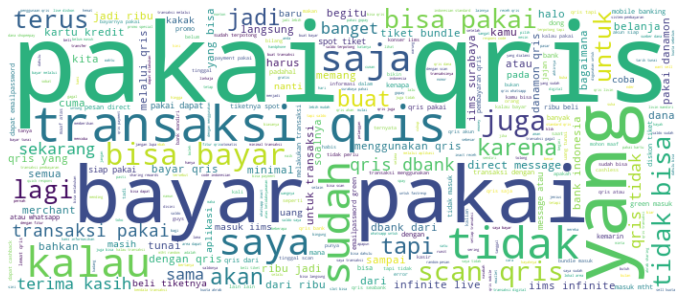

In [33]:
# WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# Show most used words

common_review = freq_dist.most_common(100)
print(common_review)

[('qris', 8482), ('pakai', 4562), ('transaksi', 4250), ('bisa', 3151), ('tidak', 2759), ('bayar', 2746), ('yang', 2537), ('sudah', 1392), ('untuk', 1316), ('dengan', 1257), ('saya', 1221), ('kalau', 1207), ('dari', 1040), ('saja', 904), ('tapi', 889), ('dapat', 875), ('jadi', 874), ('juga', 834), ('pembayaran', 801), ('melalui', 799), ('bank', 793), ('scan', 792), ('atau', 791), ('ribu', 728), ('masuk', 692), ('buat', 674), ('tunai', 644), ('dana', 640), ('beli', 605), ('banget', 574), ('lagi', 571), ('⌗', 549), ('saldo', 539), ('terus', 527), ('tiket', 522), ('kamu', 517), ('menggunakan', 516), ('aplikasi', 497), ('iims', 492), ('sekarang', 469), ('karena', 468), ('lebih', 464), ('akan', 456), ('minimal', 455), ('cashback', 451), ('uang', 451), ('kartu', 447), ('promo', 441), ('merchant', 441), ('sama', 433), ('belum', 402), ('diskon', 381), ('lain', 372), ('hari', 366), ('indonesia', 363), ('terima', 355), ('dbank', 355), ('gopay', 353), ('kasih', 352), ('langsung', 344), ('begitu', 

In [35]:
# Insert the 500 sample into dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

words  count
0        qris   8482
1       pakai   4562
2   transaksi   4250
3        bisa   3151
4       tidak   2759
..        ...    ...
95      pesan    231
96     pernah    230
97      kakak    227
98     kredit    226
99    digital    224

[100 rows x 2 columns]

In [36]:
# sort a sample of words based on their frequency of occurrence in descending order and then select the top 15 most frequent words.

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]
top15

words  count
0        qris   8482
1       pakai   4562
2   transaksi   4250
3        bisa   3151
4       tidak   2759
5       bayar   2746
6        yang   2537
7       sudah   1392
8       untuk   1316
9      dengan   1257
10       saya   1221
11      kalau   1207
12       dari   1040
13       saja    904
14       tapi    889

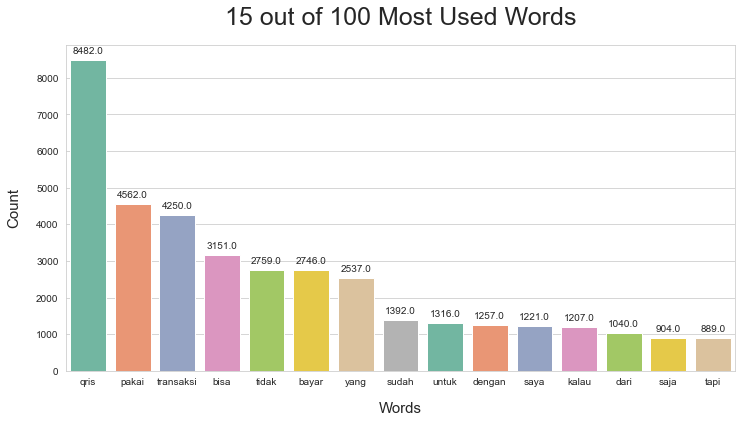

In [37]:
#visualize

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 out of 100 Most Used Words", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

### 3. Remove Stopwords



Stopwords are common words that are frequently filtered out or excluded from text data during text analysis and natural language processing (NLP) tasks. Similar to English, these stopwords are considered to be of little value in understanding the content of the text because they do not carry significant meaning on their own and are primarily used for grammatical structure.

Examples of stopwords in Bahasa Indonesia include words like "dan" (and), "atau" (or), "saya" (I), "kamu" (you), "di" (in, at), "dari" (from), "untuk" (for), and many others.

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Nab\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Nab\AppData\R

True

In [39]:
#Showing Indonesian stopword
indonesian_stop = stopwords.words('indonesian')

print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [40]:
# Insert Indonesian stopword to a dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [41]:
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

In [42]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

df['stop_text'] = df['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [43]:
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  \
0       2023-02                   semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...   
2       2023-02  orang kristen tidak suka bayar tunaicash karen...   
3       2023-02         ken arok kalo bayar pake qris mpu gandring   
4       2023-02  coba diliat ditatonya nder kali aja ada qris n...   
...         ...                                                ...   
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...   
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...   
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...   
7869    2024-06                       mau netflix bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...   

                                          normalization  \
0                     semalem berhasil bayar pakai qris   
1     membeli gula mau bayar tunai atau debit bisa p...   
2     orang kristen tidak suka bayar tunaicash karen...   
3          ken arok kalau bayar pakai qris mpu gandring   
4     coba diliat ditatonya nder kali saja ada qris ...   
...                                                 ...   
7866  haii kyu ada saldo receh nominal rahasia buat ...   
7867  banyak orang tidak tahu kalau mencari uang itu...   
7868  di aku siap ni kak murah all ewallet amp qris ...   
7869                   mau netflix bulan yang bisa qris   
7870  giveaway saldo receh buat ba only yang punya q...   

                                             final_text  \
0                     semalem berhasil bayar pakai qris   
1     membeli gula  bayar tunai atau debit bisa paka...   
2     orang kristen tidak suka bayar tunaicash karen...   
3                 arok kalau bayar pakai qris  gandring   
4     coba diliat ditatonya nder kali saja  qris   b...   
...                                                 ...   
7866  haii   saldo receh nominal rahasia buat  yang ...   
7867  banyak orang tidak tahu kalau mencari uang  se...   
7868    siap   murah  ewallet  qris direct message  ...   
7869                       netflix bulan yang bisa qris   
7870  giveaway saldo receh buat  only yang punya qri...   

                                                  token  \
0                [semalem, berhasil, bayar, pake, qris]   
1     [mbeli, gula, mw, bayar, tunai, atau, debit, b...   
2     [orang, kristen, tidak, suka, bayar, tunaicash...   
3     [ken, arok, kalo, bayar, pake, qris, mpu, gand...   
4     [coba, diliat, ditatonya, nder, kali, aja, ada...   
...                                              

In [44]:
# To display all values in the 'Komentar' column
all_komentar_values = df['stop_text'].head(5).tolist()


# Print the formatted string
print(all_komentar_values)

[['semalem', 'berhasil', 'bayar', 'pake', 'qris'], ['mbeli', 'gula', 'mw', 'bayar', 'tunai', 'debit', 'bs', 'pake', 'qris', 'wow', 'gkbisa', 'dik', 'tunai', 'aja', 'mending', 'tersenyum', 'ni', 'jt', 'dibayar', 'tunai', 'sahh', 'tpuk', 'tangan', 'hadirin'], ['orang', 'kristen', 'suka', 'bayar', 'tunaicash', 'dosa', 'dibayar', 'jesus', 'qris'], ['ken', 'arok', 'kalo', 'bayar', 'pake', 'qris', 'mpu', 'gandring'], ['coba', 'diliat', 'ditatonya', 'nder', 'kali', 'aja', 'qris', 'ntr', 'bayar', 'disitu', 'aja']]


### 4. Stemming

Stemming is a text normalization technique used to reduce words to their root or base form. The goal of stemming is to simplify words by removing prefixes or suffixes to convert them into a common, basic form. This can help improve the efficiency of text analysis and information retrieval for Bahasa Indonesia.

In [45]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

df['stem_text'] = df['stop_text'].apply(lambda stem:back_to_root(stem))
df

created_at  \
0    2023-02-03 00:49:51+00:00   
1    2023-02-03 15:31:50+00:00   
2    2023-02-04 05:24:06+00:00   
3    2023-02-04 05:24:06+00:00   
4    2023-02-04 05:36:21+00:00   
...                        ...   
7866 2024-06-24 04:55:11+00:00   
7867 2024-06-24 06:10:37+00:00   
7868 2024-06-24 06:23:05+00:00   
7869 2024-06-24 07:09:20+00:00   
7870 2024-06-24 07:19:41+00:00   

                                               Komentar Sentiment     Score  \
0     Semalem berhasil bayar pake QRIS https://t.co/...   neutral  0.989646   
1     *mbeli gula* mw bayar tunai atau debit? bs pak...  negative  0.775546   
2     Orang Kristen tidak suka bayar tunai/cash kare...  negative  0.958232   
3            ken arok kalo bayar pake qris mpu gandring   neutral  0.983039   
4     @Askrlfess Coba diliat ditatonya nder Kali aja...   neutral  0.987434   
...                                                 ...       ...       ...   
7866  haii haii kyu ada saldo receh nominal rahasia ...   neutral  0.975304   
7867  Banyak orang gatau kalau nyari duit itu segamp...   neutral  0.869174   
7868  Di aku ready nih kak! Murce murce all e-wallet...   neutral  0.992647   
7869           mau netflix 1 bulan yg bs qris #zonauang   neutral  0.996733   
7870  giveaway saldo receh buat BA only yang punya Q...  negative  0.573749   

     month_year                                         clean_text  \
0       2023-02                   semalem berhasil bayar pake qris   
1       2023-02  mbeli gula mw bayar tunai atau debit bs pake q...   
2       2023-02  orang kristen tidak suka bayar tunaicash karen...   
3       2023-02         ken arok kalo bayar pake qris mpu gandring   
4       2023-02  coba diliat ditatonya nder kali aja ada qris n...   
...         ...                                                ...   
7866    2024-06  haii kyu ada saldo receh nominal rahasia buat ...   
7867    2024-06  banyak orang gatau kalau nyari duit itu segamp...   
7868    2024-06  di aku ready nih kak murce all ewallet amp qri...   
7869    2024-06                       mau netflix bulan yg bs qris   
7870    2024-06  giveaway saldo receh buat ba only yang punya q...   

                                          normalization  \
0                     semalem berhasil bayar pakai qris   
1     membeli gula mau bayar tunai atau debit bisa p...   
2     orang kristen tidak suka bayar tunaicash karen...   
3          ken arok kalau bayar pakai qris mpu gandring   
4     coba diliat ditatonya nder kali saja ada qris ...   
...                                                 ...   
7866  haii kyu ada saldo receh nominal rahasia buat ...   
7867  banyak orang tidak tahu kalau mencari uang itu...   
7868  di aku siap ni kak murah all ewallet amp qris ...   
7869                   mau netflix bulan yang bisa qris   
7870  giveaway saldo receh buat ba only yang punya q...   

                                             final_text  \
0                     semalem berhasil bayar pakai qris   
1     membeli gula  bayar tunai atau debit bisa paka...   
2     orang kristen tidak suka bayar tunaicash karen...   
3                 arok kalau bayar pakai qris  gandring   
4     coba diliat ditatonya nder kali saja  qris   b...   
...                                                 ...   
7866  haii   saldo receh nominal rahasia buat  yang ...   
7867  banyak orang tidak tahu kalau mencari uang  se...   
7868    siap   murah  ewallet  qris direct message  ...   
7869                       netflix bulan yang bisa qris   
7870  giveaway saldo receh buat  only yang punya qri...   

                                                  token  \
0                [semalem, berhasil, bayar, pake, qris]   
1     [mbeli, gula, mw, bayar, tunai, atau, debit, b...   
2     [orang, kristen, tidak, suka, bayar, tunaicash...   
3     [ken, arok, kalo, bayar, pake, qris, mpu, gand...   
4     [coba, diliat, ditatonya, nder, kali, aja, ada...   
...                                              

In [ ]:
# To display all values in the 'Komentar' column
all_komentar_values = df['stem_text'].head(5).tolist()


# Print the formatted string
print(all_komentar_values)

In [47]:
# Path to save the CSV file on Google Drive
save_path = 'preprocessed_alldata.csv'

# Save the DataFrame to CSV
df.to_csv(save_path, index=False)

## Data Vizualitation

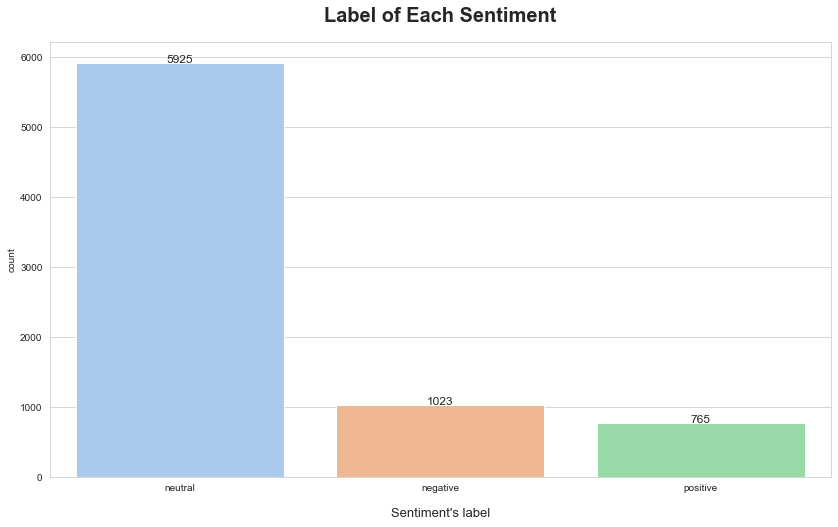

In [48]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen netral, positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='Sentiment', data=df, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Label of Each Sentiment", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

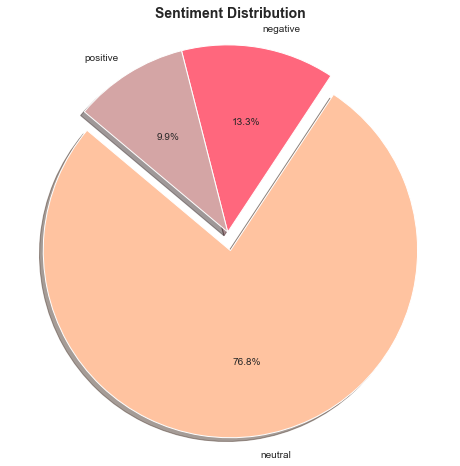

In [49]:
# Define data for the pie chart
# Get the value counts of sentiment labels in your DataFrame
sentiment_counts = df['Sentiment'].value_counts().to_dict()
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#FFC3A0', '#FF677D', '#D4A5A5']  # You can customize the colors
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

### Wordcloud for positive sentiment

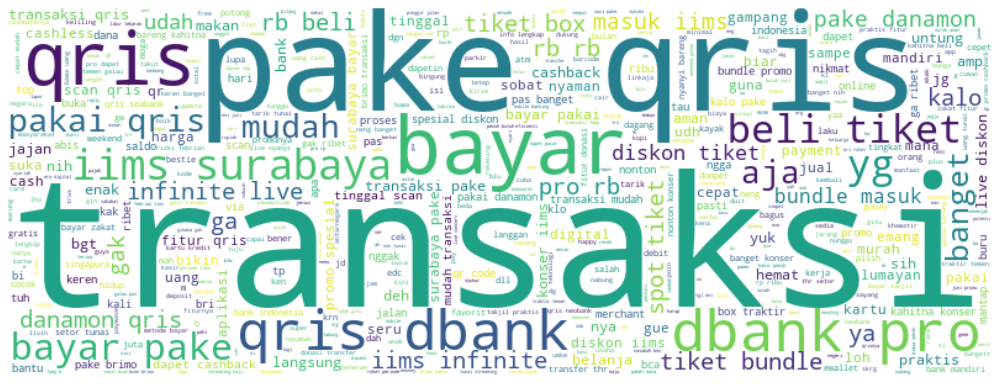

In [50]:
sentiment_pos = ' '.join([review for review in df['stem_text'][df['Sentiment'] == 'positive']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

### Wordcloud for negative sentiment

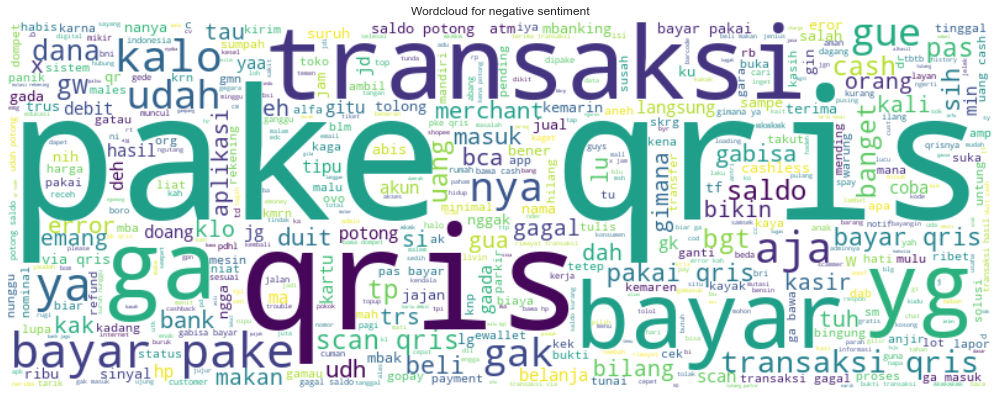

In [51]:
negative_pos = ' '.join([review for review in df['stem_text'][df['Sentiment'] == 'negative']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(negative_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.title("Wordcloud for negative sentiment")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

### Wordcloud for neutral sentiment

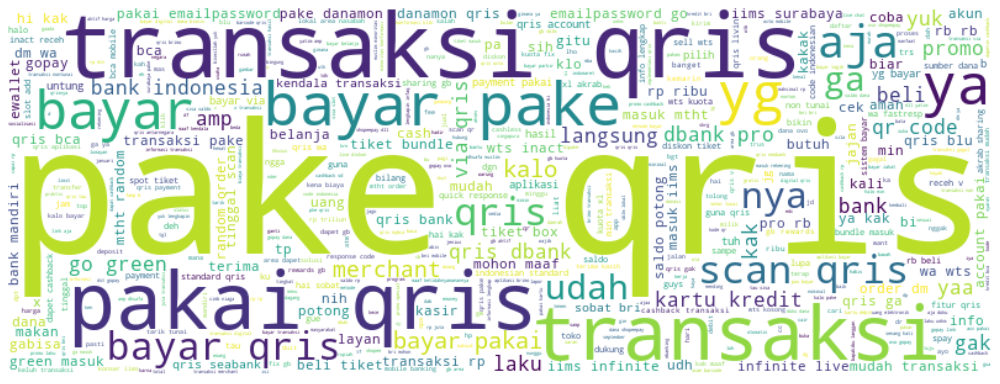

In [52]:
neutral_pos = ' '.join([review for review in df['stem_text'][df['Sentiment'] == 'neutral']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(neutral_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()